# Data Understanding & Preparation
Load and inspect the data using Pandas. Check the shape, data types, and missing values using .info(), .describe(), and .isnull().sum(). Create a table summarizing features and handle missing data by deciding whether to drop rows or impute values.

In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Pandagod\Projects\Projects\songs.csv'
songs_df = pd.read_csv(file_path)

# Inspect the data
print("Shape of the dataset:", songs_df.shape)
print("\nData Types and Missing Values:")
print(songs_df.info())
print("\nSummary Statistics:")
print(songs_df.describe())
print("\nMissing Values Count:")
print(songs_df.isnull().sum())

# Create a table summarizing features
feature_summary = pd.DataFrame({
    'Feature': songs_df.columns,
    'Data Type': songs_df.dtypes,
    'Missing Values': songs_df.isnull().sum(),
    'Unique Values': songs_df.nunique()
})
print("\nFeature Summary:")
print(feature_summary)

# Handle missing data
# Drop rows with missing lyrics
songs_df = songs_df.dropna(subset=['lyrics'])

# Impute missing values for categorical features with mode
categorical_features = songs_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    mode_value = songs_df[feature].mode()[0]
    songs_df[feature].fillna(mode_value, inplace=True)

# Verify missing values are handled
print("\nMissing Values Count After Handling:")
print(songs_df.isnull().sum())

Shape of the dataset: (900, 28)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  a

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18168\4091322947.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs_df[feature].fillna(mode_value, inplace=True)


# Descriptive Statistics
Calculate mean, median, range, and standard deviation for numerical features. Visualize distributions using histograms, boxplots, or density plots. Count unique values and frequencies for categorical features and visualize distributions using bar plots or pie charts.


Descriptive Statistics for Numerical Features:
                  count           mean           std       min            25%  \
Unnamed: 0        900.0     449.500000    259.951919       0.0     224.750000   
track_popularity  900.0       0.199545      0.199525       0.0       0.045455   
danceability      900.0       0.623394      0.183919       0.0       0.504248   
energy            900.0       0.640775      0.181130       0.0       0.527578   
key               900.0       0.484444      0.334353       0.0       0.181818   
loudness          900.0       0.726726      0.111564       0.0       0.681972   
mode              900.0       0.574444      0.494702       0.0       0.000000   
speechiness       900.0       0.115008      0.133004       0.0       0.023636   
acousticness      900.0       0.225910      0.238884       0.0       0.043808   
liveness          900.0       0.160050      0.139023       0.0       0.077727   
valence           900.0       0.518995      0.237509       0.

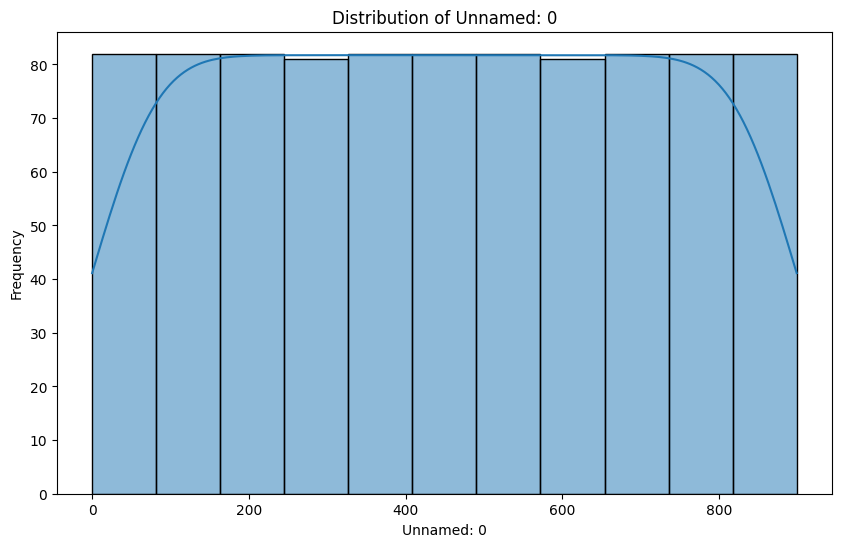

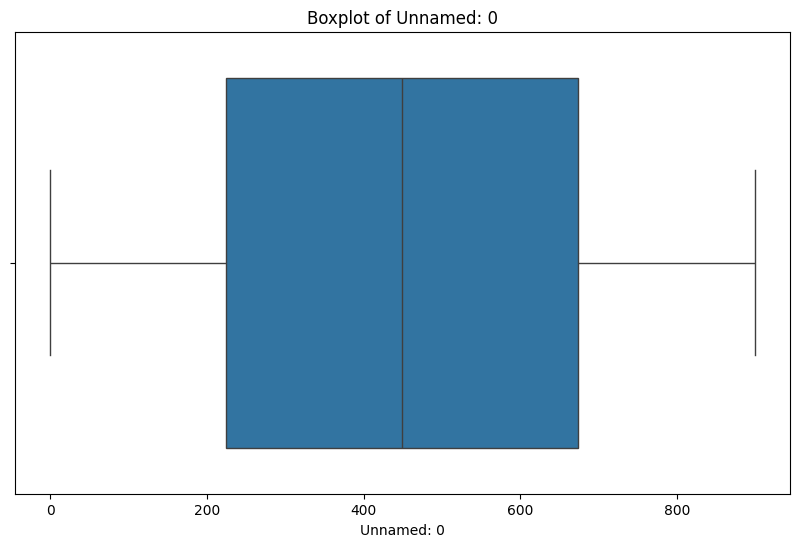

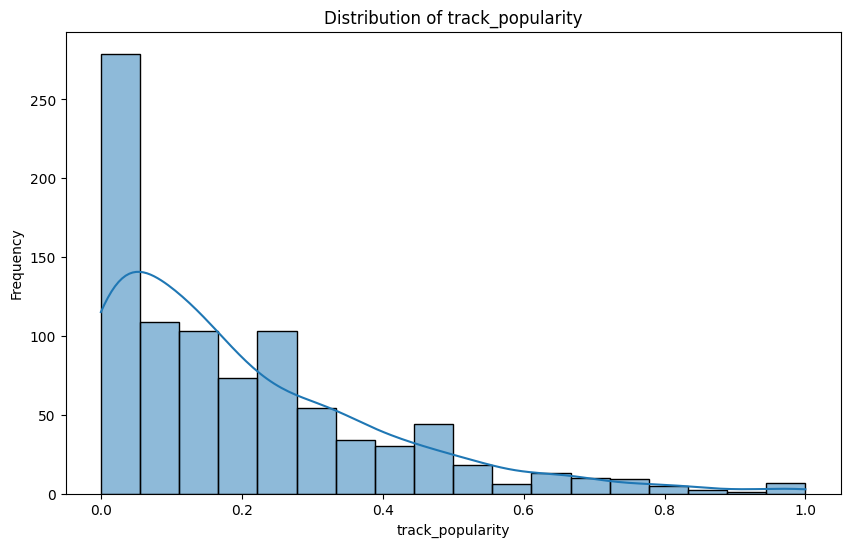

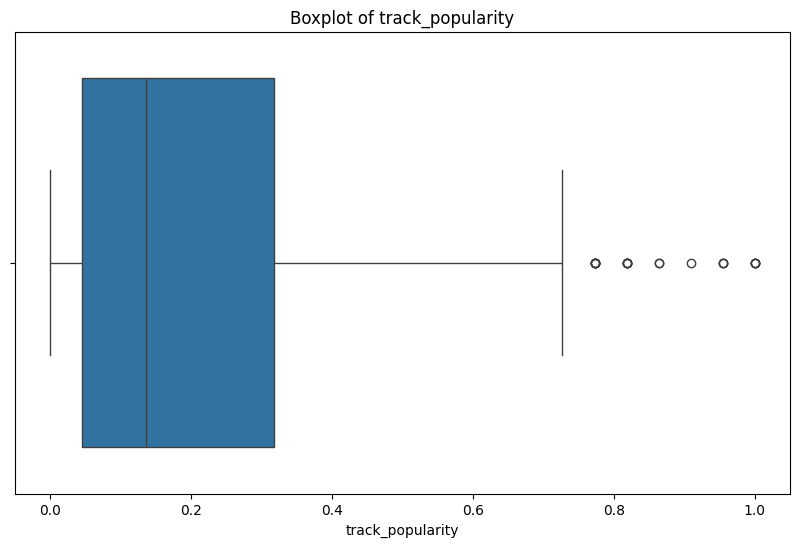

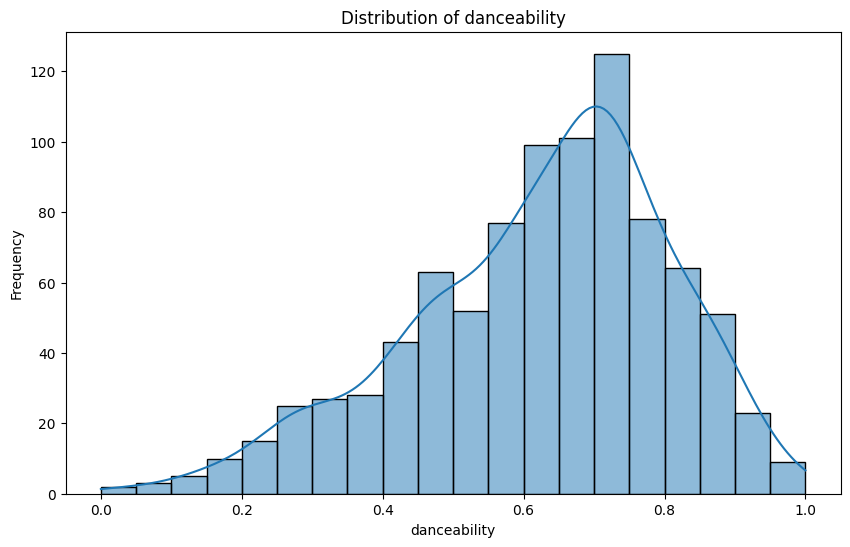

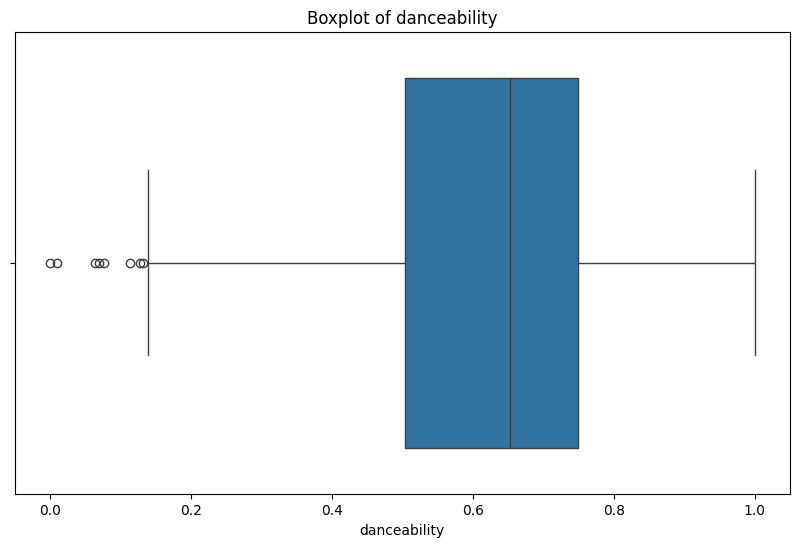

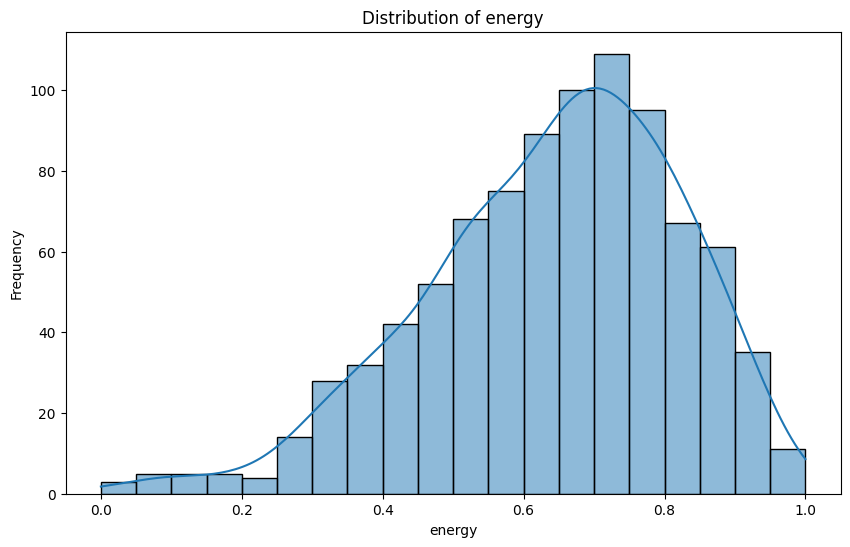

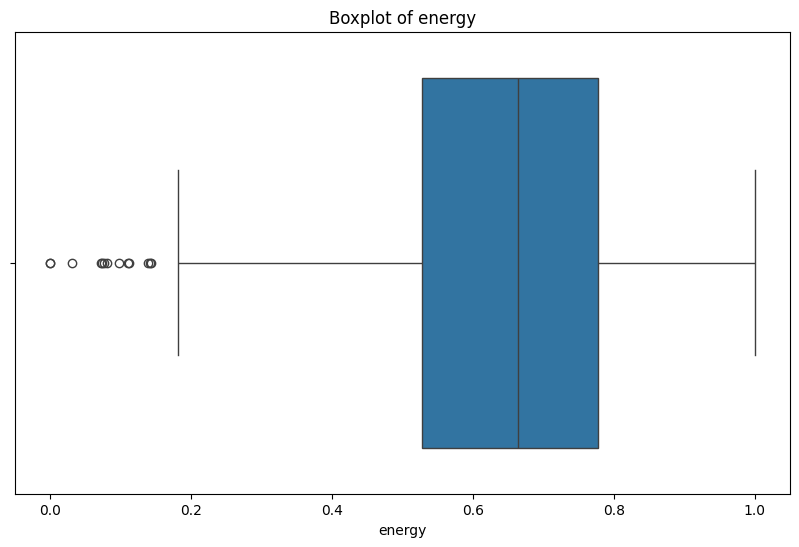

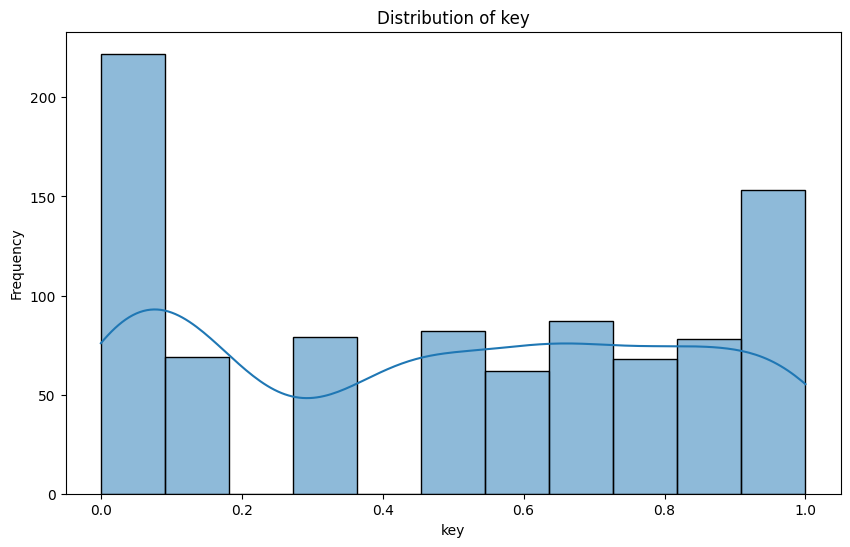

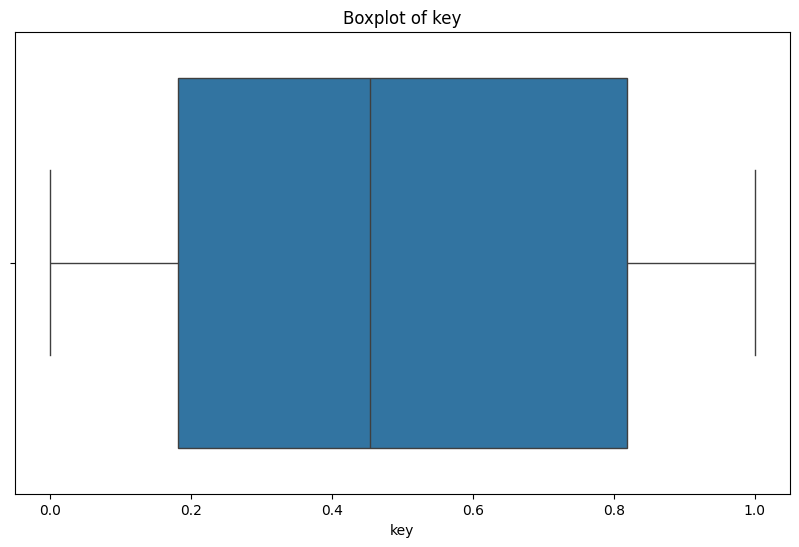

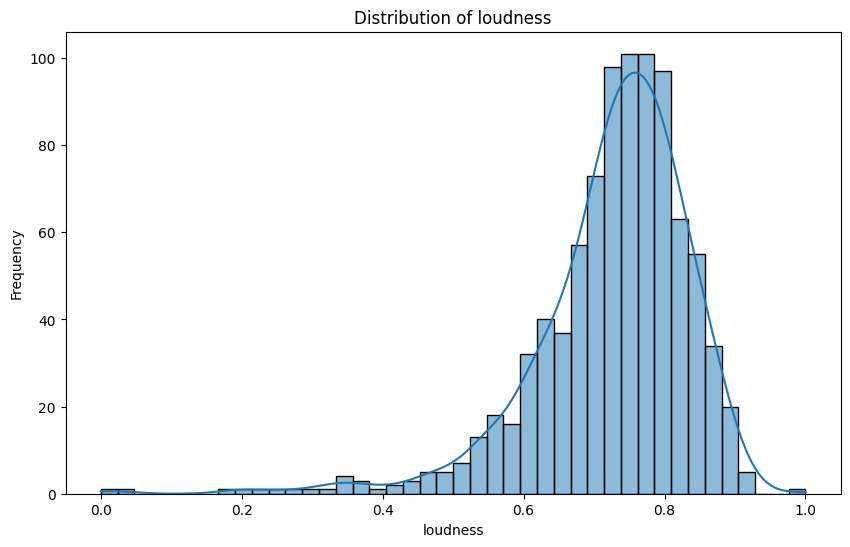

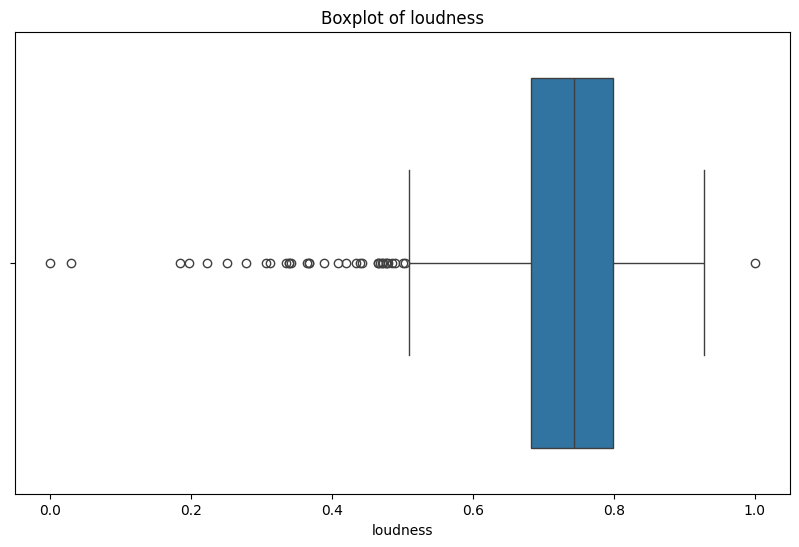

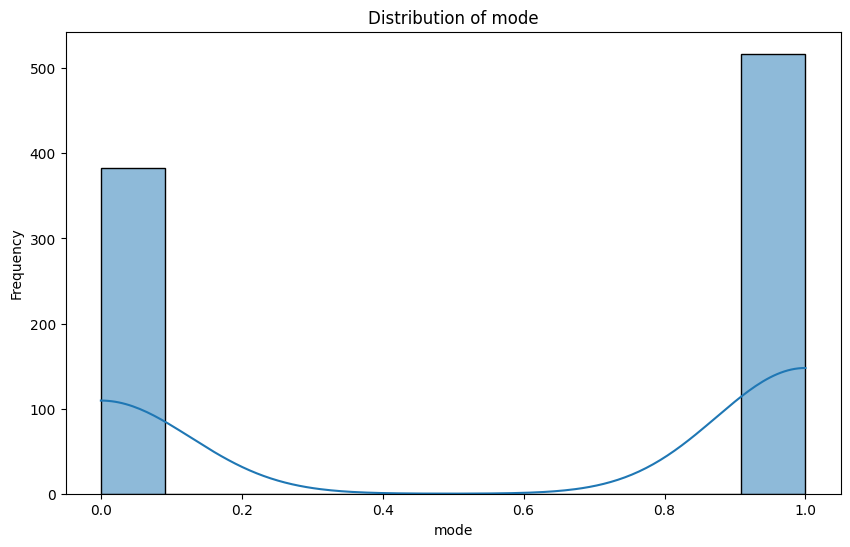

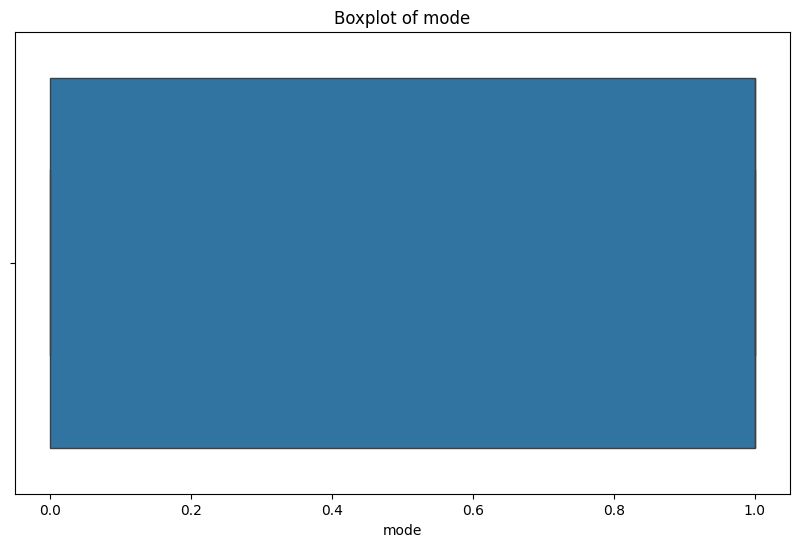

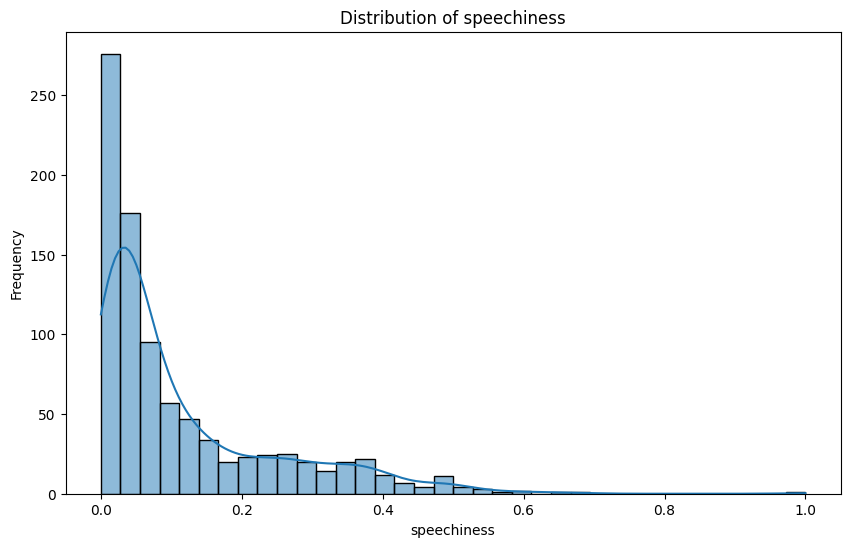

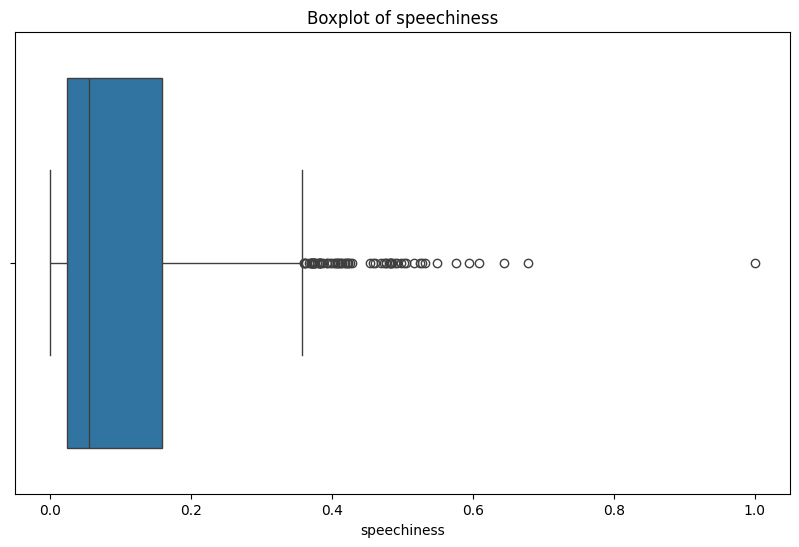

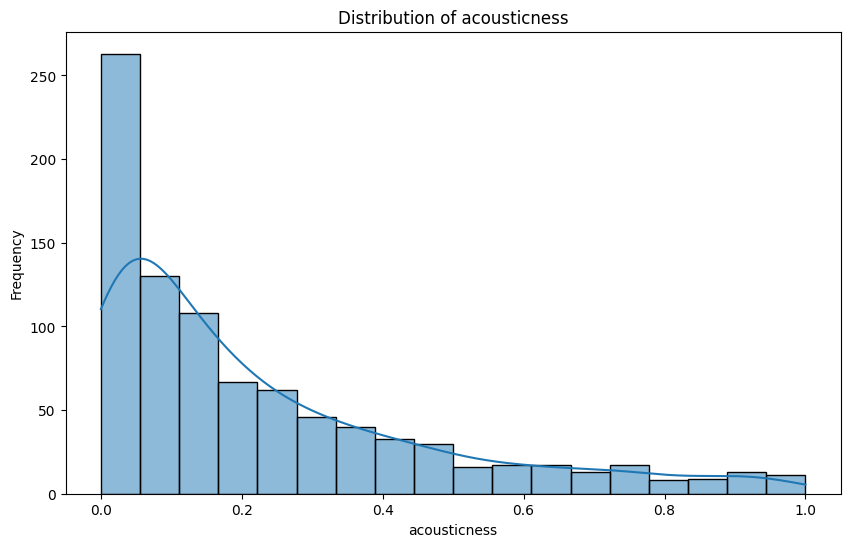

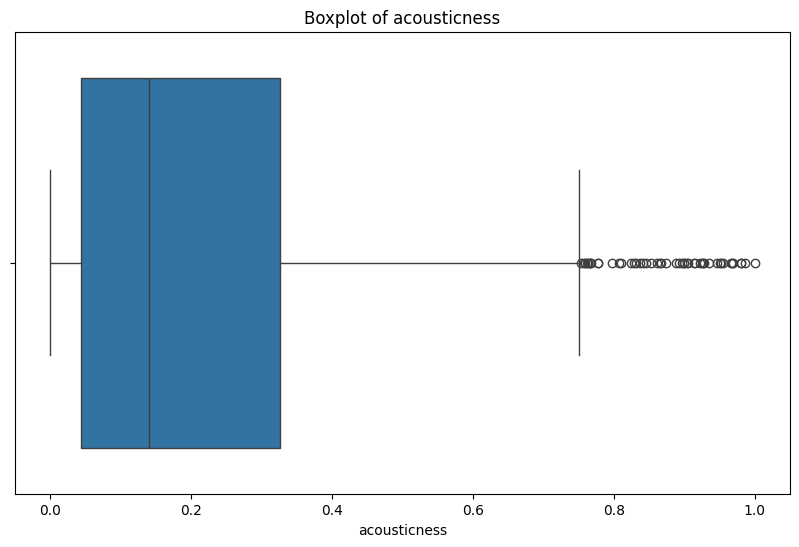

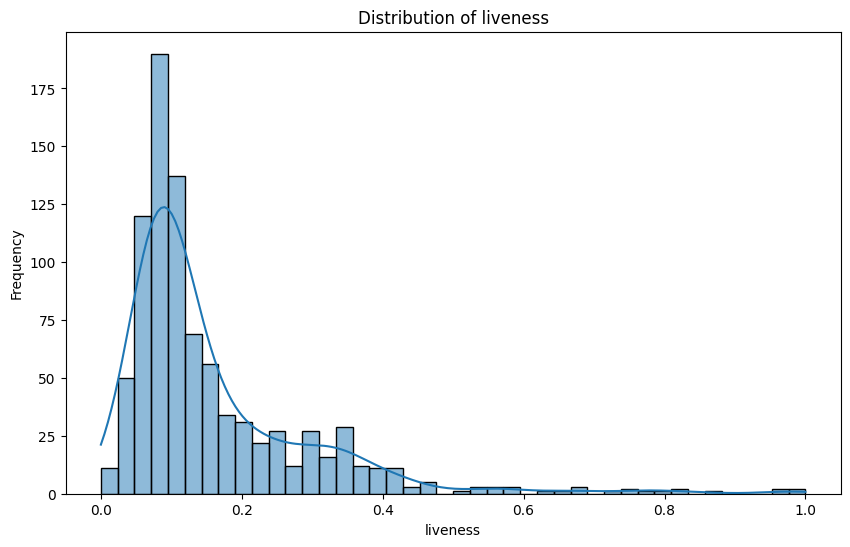

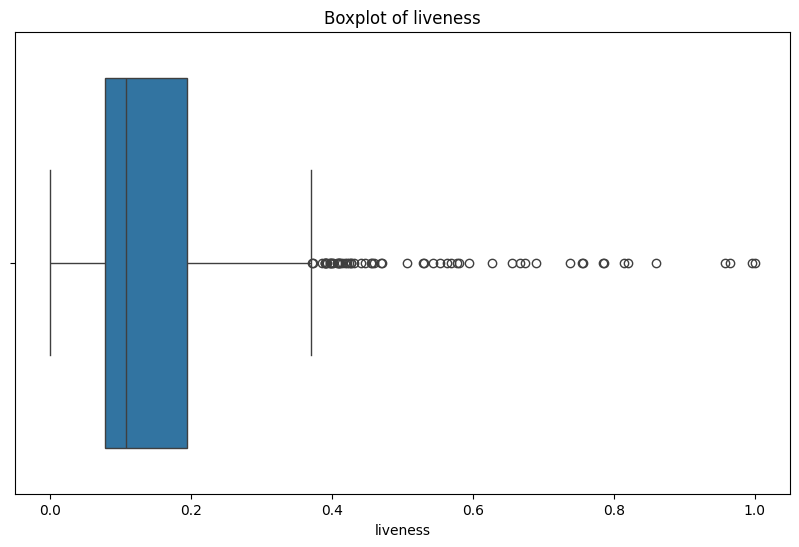

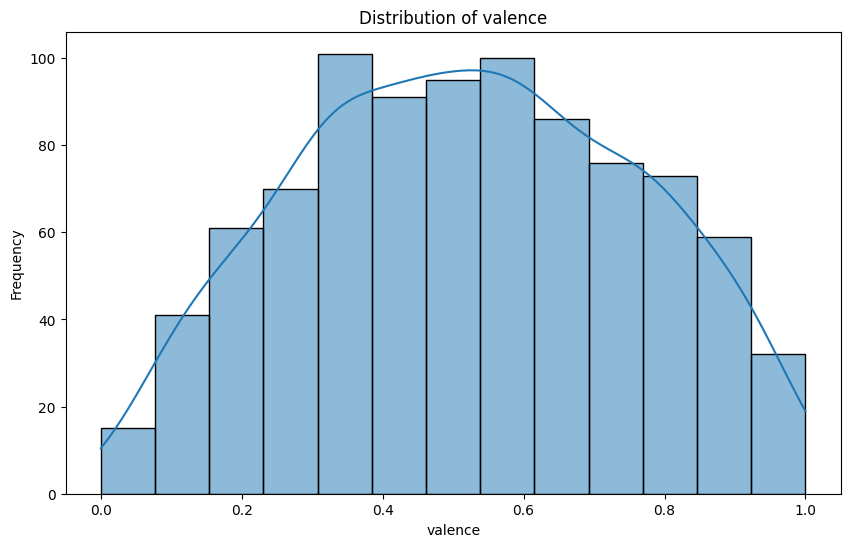

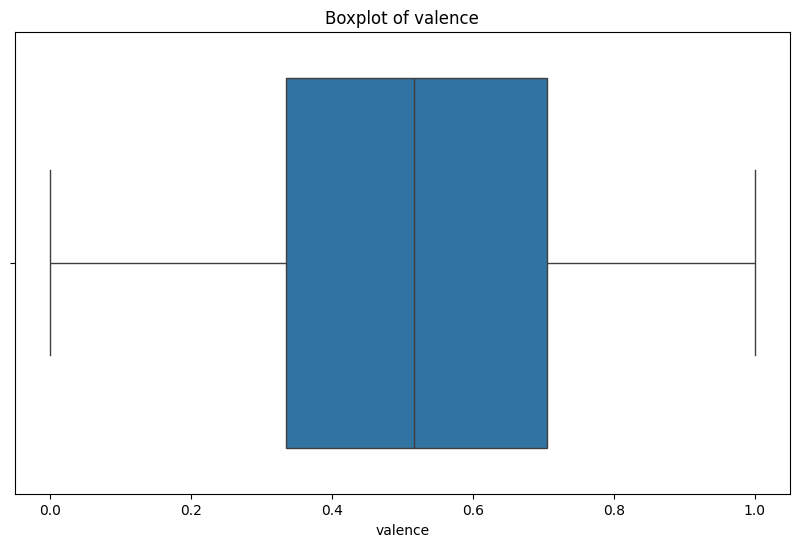

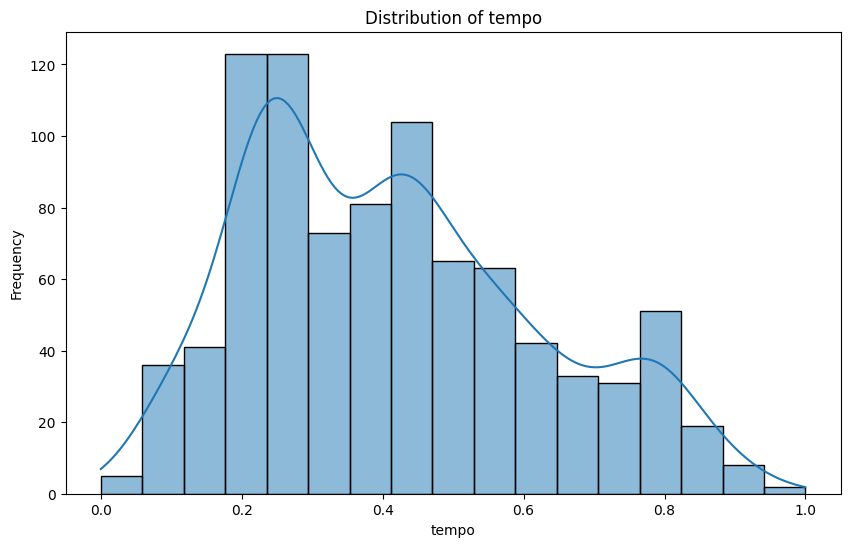

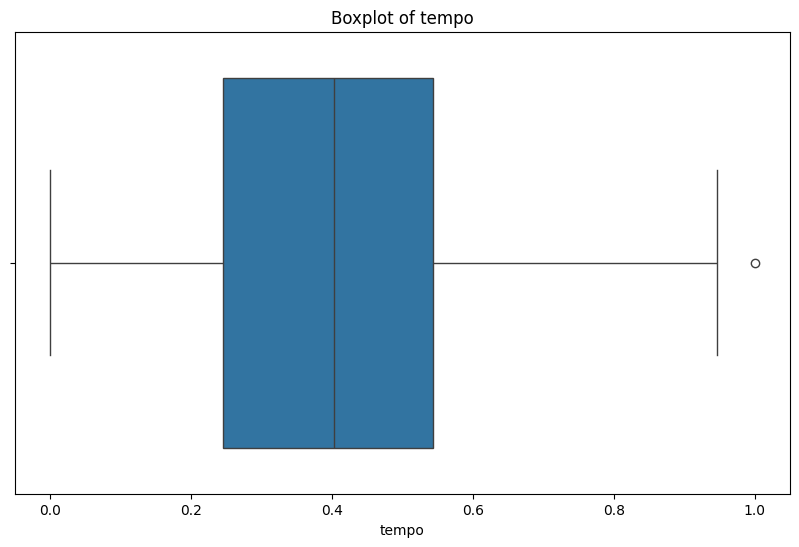

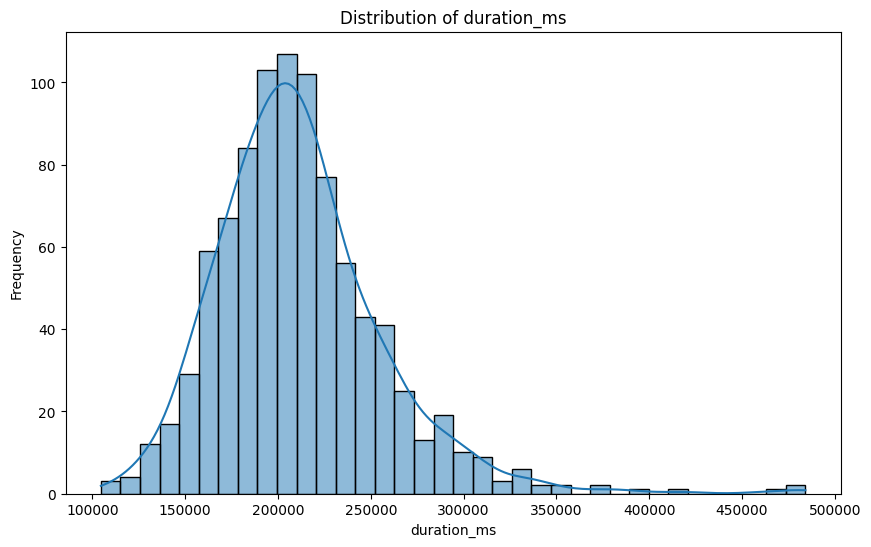

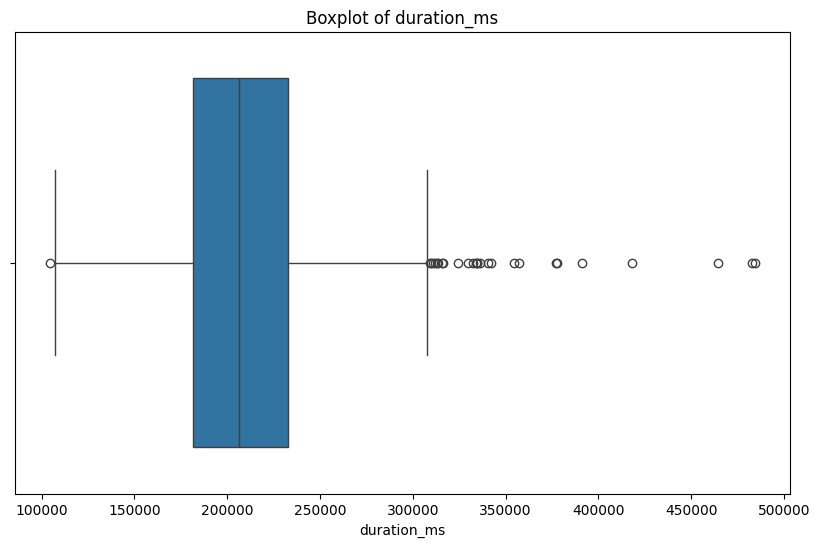

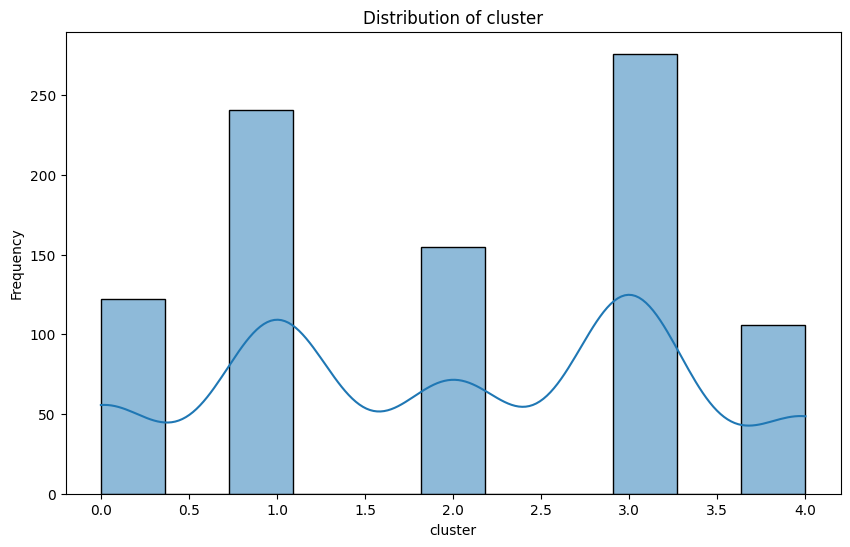

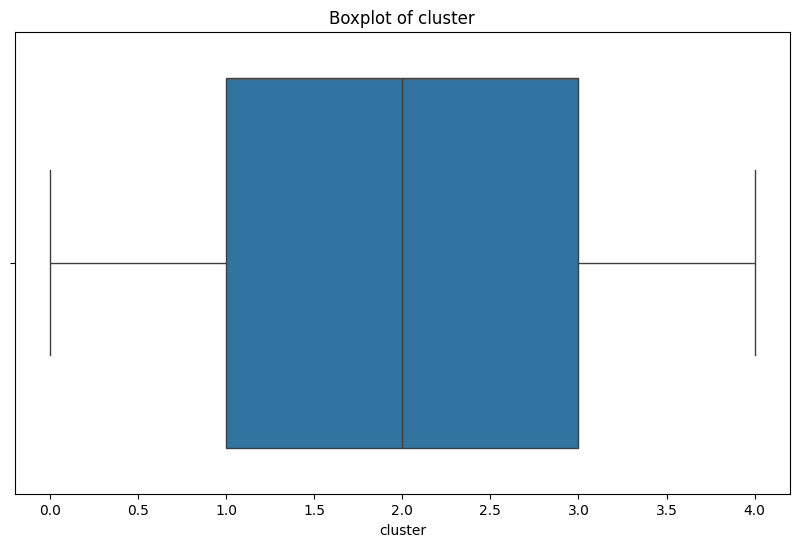

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate descriptive statistics for numerical features
numerical_features = songs_df.select_dtypes(include=['float64', 'int64']).columns
descriptive_stats = songs_df[numerical_features].describe().T
descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']
print("\nDescriptive Statistics for Numerical Features:")
print(descriptive_stats)

# Visualize distributions of numerical features
for feature in numerical_features:
    if feature != 'lyrics':  # Exclude the lyrics column
        plt.figure(figsize=(10, 6))
        sns.histplot(songs_df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.boxplot(x=songs_df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        plt.show()

# Popularity Analysis
Plot a histogram of Popularity Score to see if it’s skewed. Create a heatmap of correlations between popularity and audio features. Use scatterplots to explore relationships like Popularity vs. Loudness or Tempo. Group by Genre or Artist and plot average popularity.

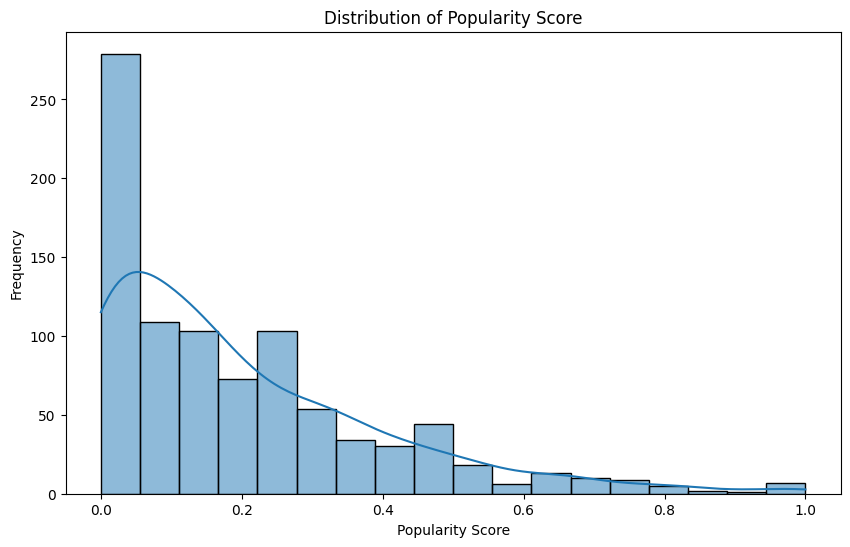

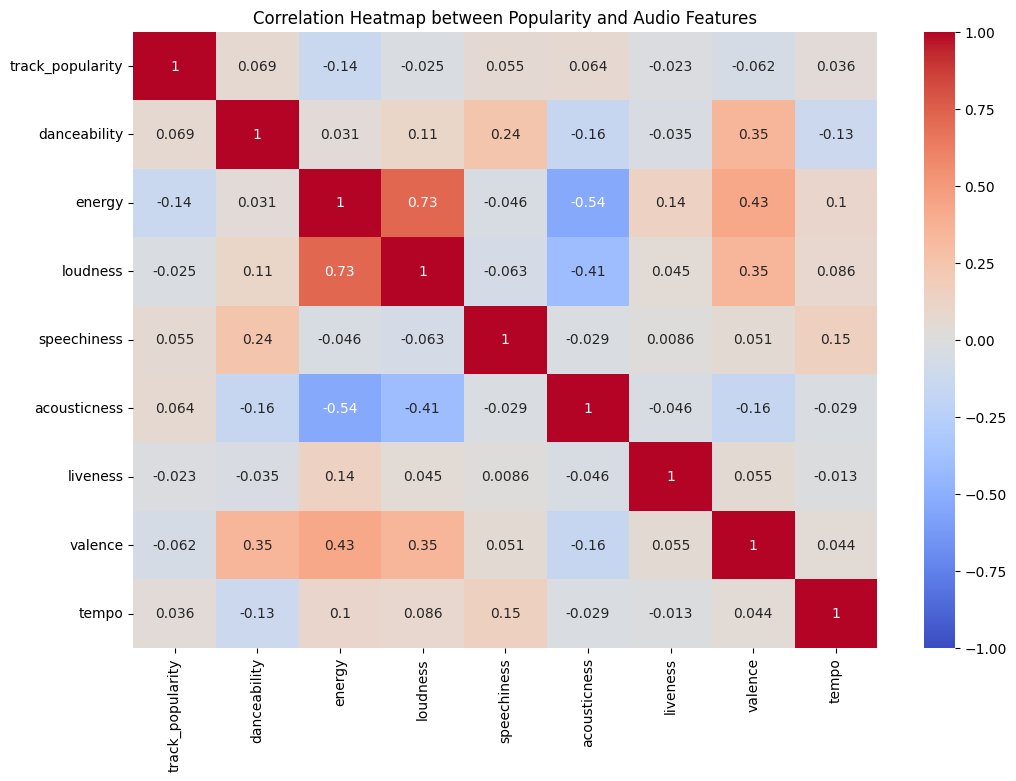

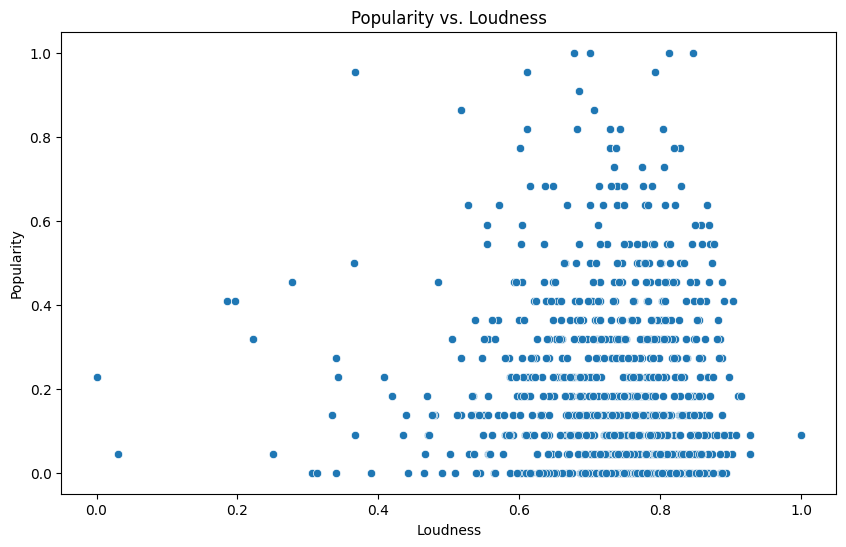

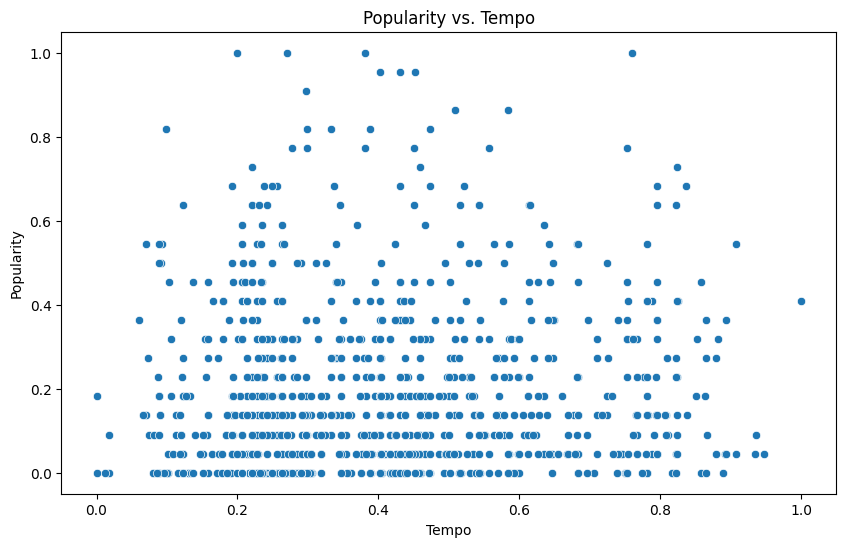

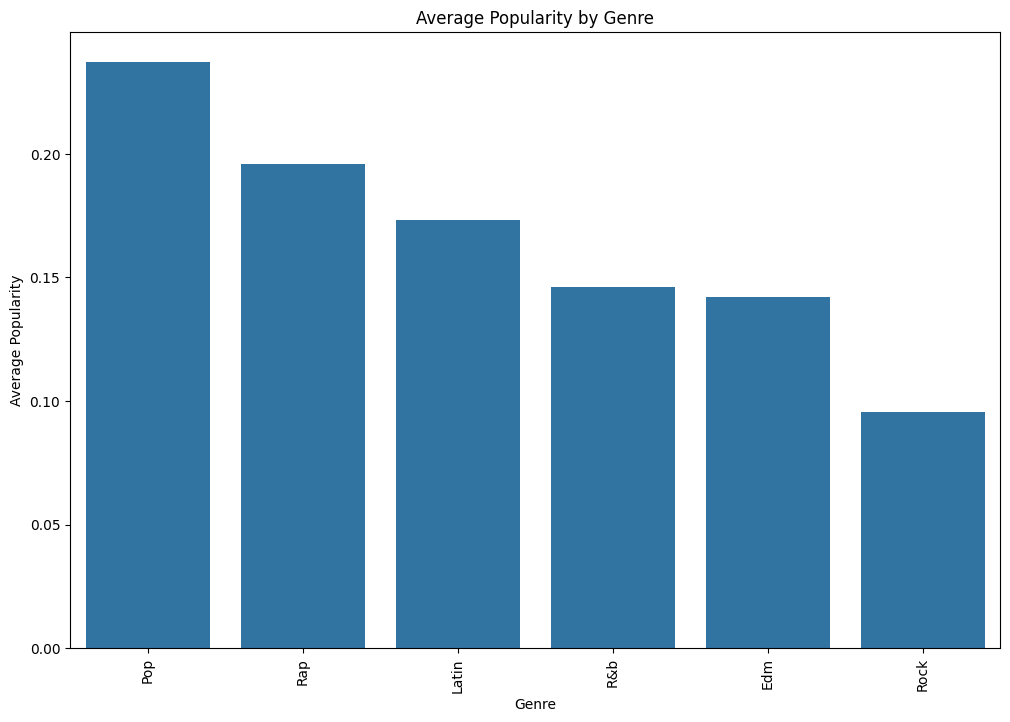

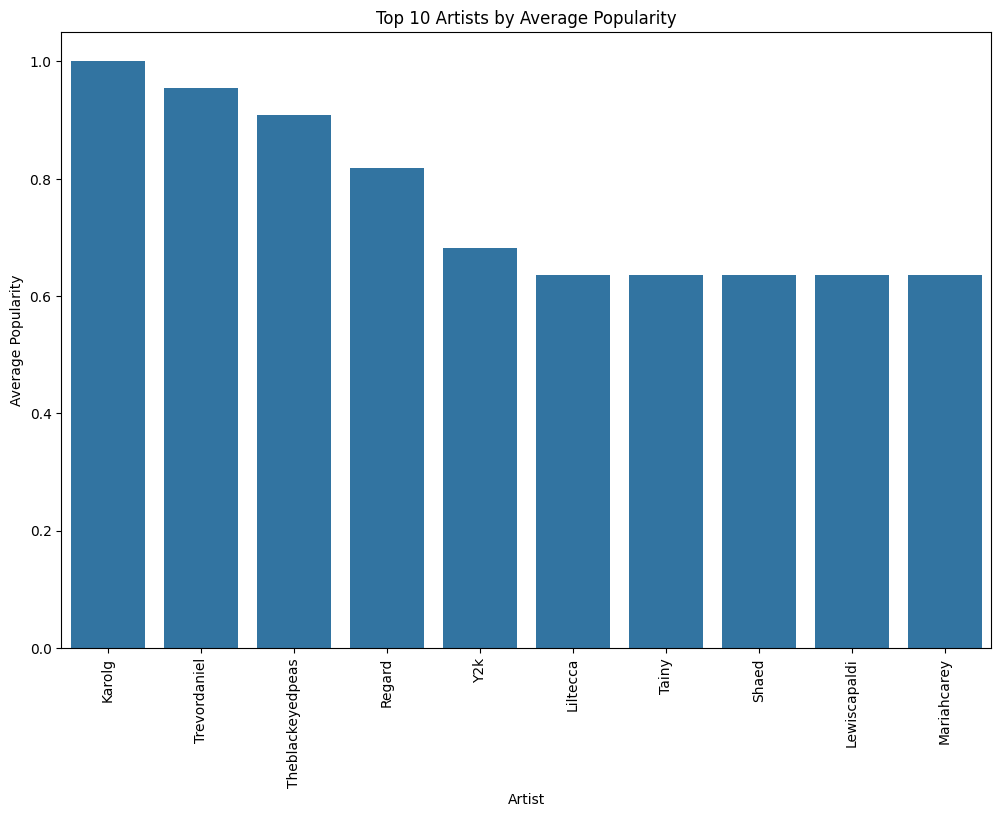

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of Popularity Score
plt.figure(figsize=(10, 6))
sns.histplot(songs_df['track_popularity'], kde=True)
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

# Create a heatmap of correlations between popularity and audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
correlation_matrix = songs_df[['track_popularity'] + audio_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Popularity and Audio Features')
plt.show()

# Scatterplots to explore relationships like Popularity vs. Loudness or Tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='track_popularity', data=songs_df)
plt.title('Popularity vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='track_popularity', data=songs_df)
plt.title('Popularity vs. Tempo')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()

# Group by Genre and plot average popularity
genre_popularity = songs_df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

# Group by Artist and plot average popularity
artist_popularity = songs_df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=artist_popularity.index, y=artist_popularity.values)
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

# Audio Feature Exploration
Use pair plots or scatter matrices to explore interactions between audio features. Use PCA or t-SNE to reduce audio features to 2D and color-code by genre/popularity. Compare average Energy or Acousticness across genres using boxplots.

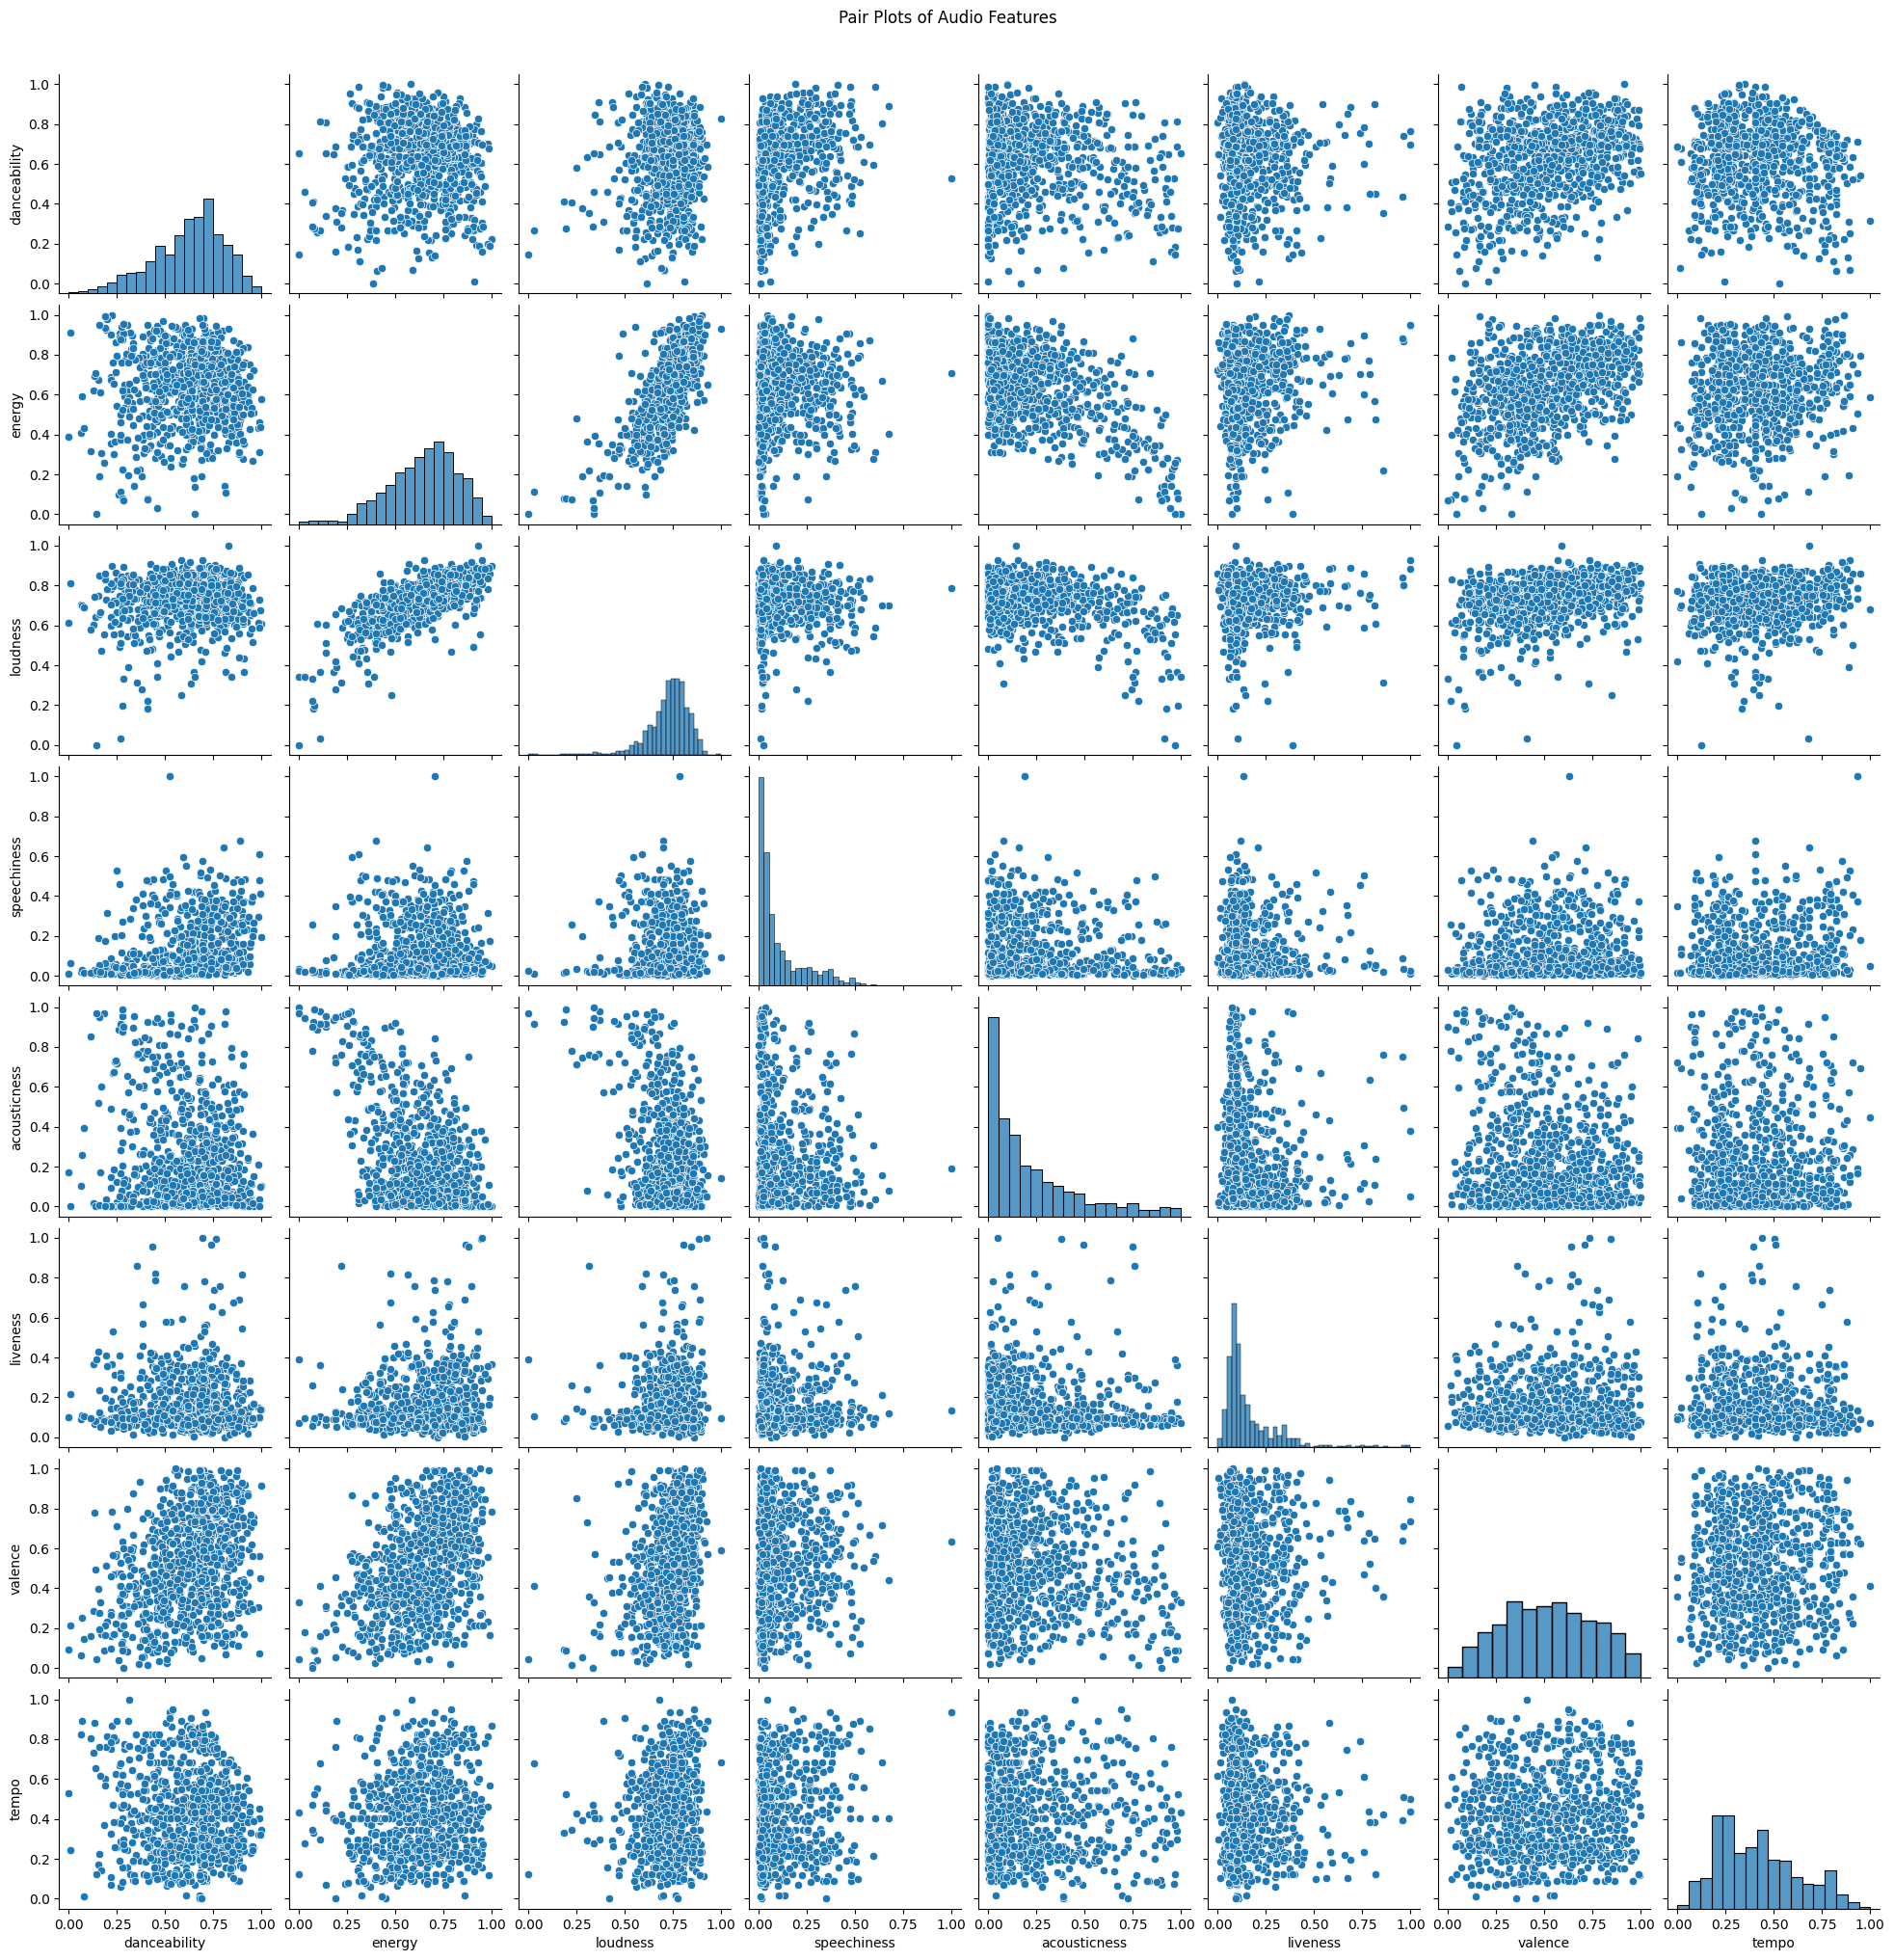

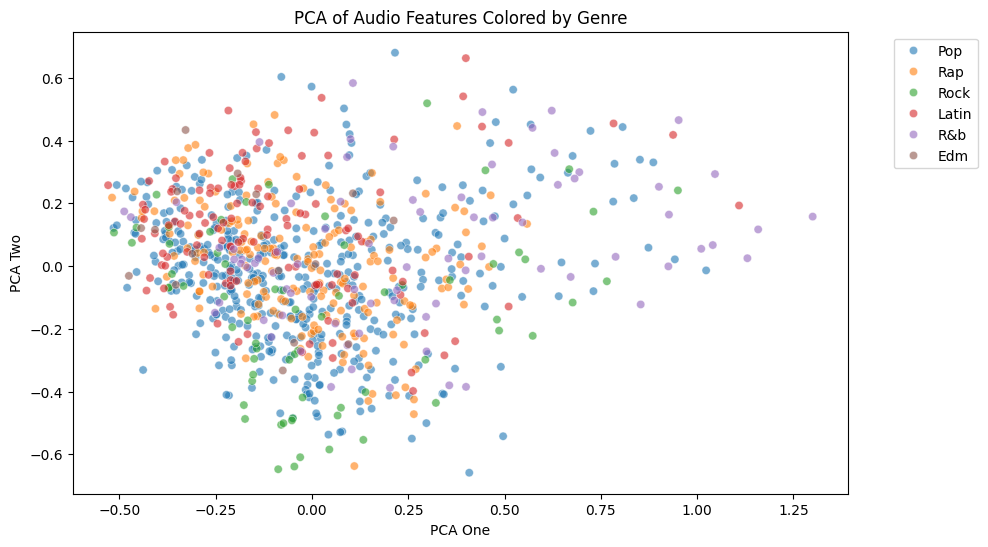

c:\Users\nikhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


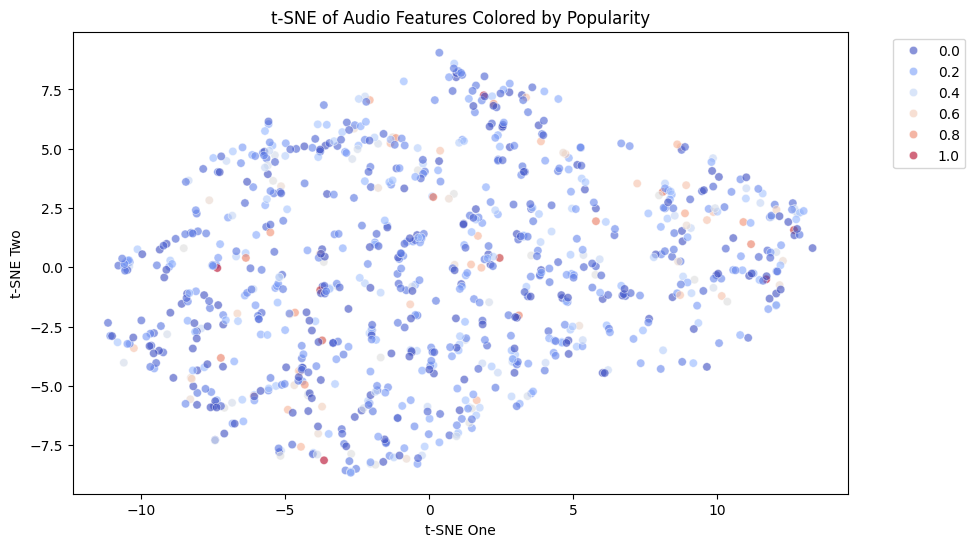

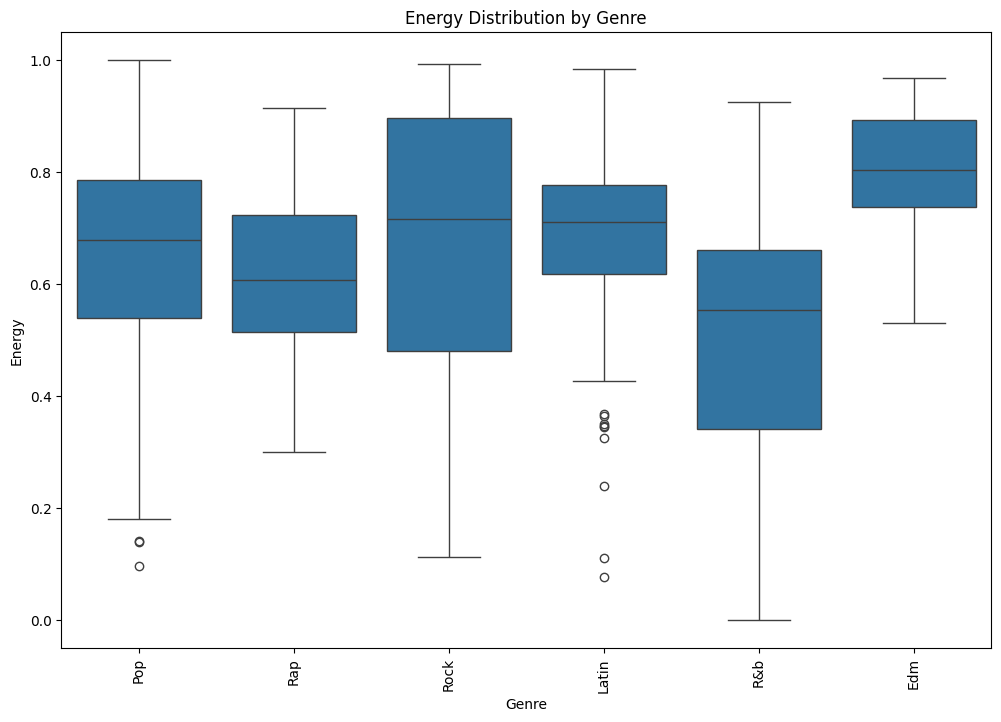

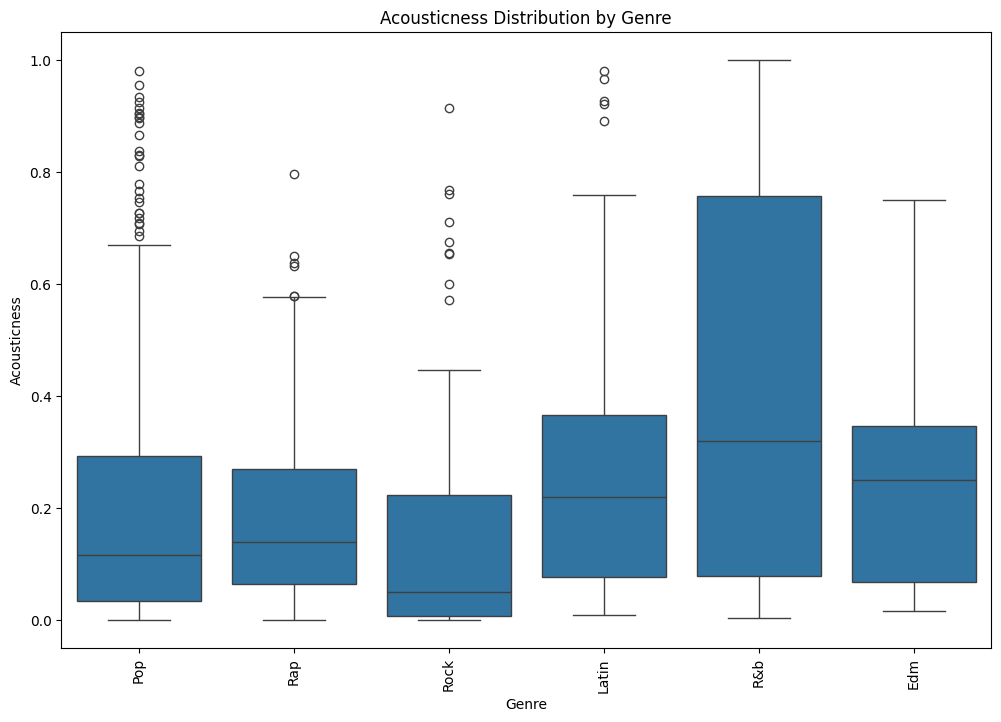

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Pair plots to explore interactions between audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
sns.pairplot(songs_df[audio_features])
plt.suptitle('Pair Plots of Audio Features', y=1.02)
plt.show()

# PCA to reduce audio features to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(songs_df[audio_features])
songs_df['pca_one'] = pca_result[:, 0]
songs_df['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='playlist_genre', data=songs_df, palette='tab10', alpha=0.6)
plt.title('PCA of Audio Features Colored by Genre')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# t-SNE to reduce audio features to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(songs_df[audio_features])
songs_df['tsne_one'] = tsne_result[:, 0]
songs_df['tsne_two'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_one', y='tsne_two', hue='track_popularity', data=songs_df, palette='coolwarm', alpha=0.6)
plt.title('t-SNE of Audio Features Colored by Popularity')
plt.xlabel('t-SNE One')
plt.ylabel('t-SNE Two')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Compare average Energy across genres using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='playlist_genre', y='energy', data=songs_df)
plt.title('Energy Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=90)
plt.show()

# Compare average Acousticness across genres using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='playlist_genre', y='acousticness', data=songs_df)
plt.title('Acousticness Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Acousticness')
plt.xticks(rotation=90)
plt.show()

# Lyrics-Based Analysis
Use NLP libraries like TextBlob to analyze lyric sentiment and compare sentiment scores with Valence. Generate word clouds for lyrics of top-popularity vs. low-popularity songs.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


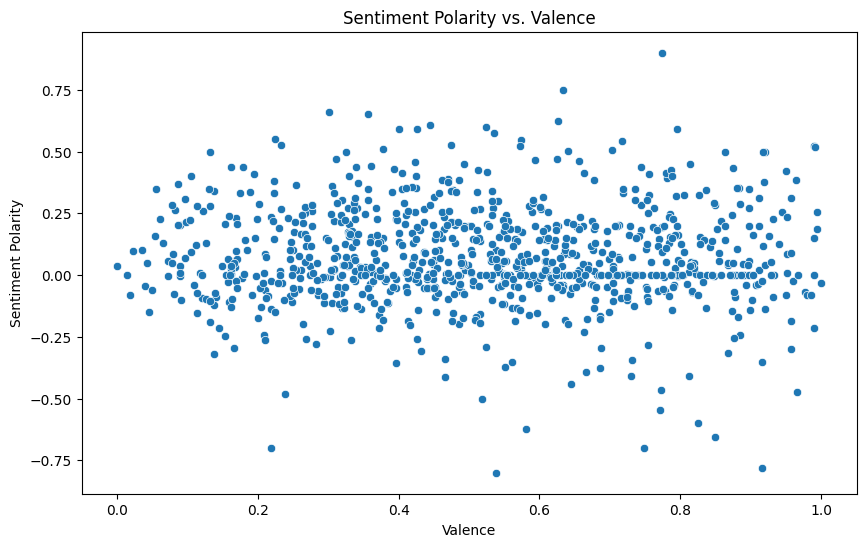

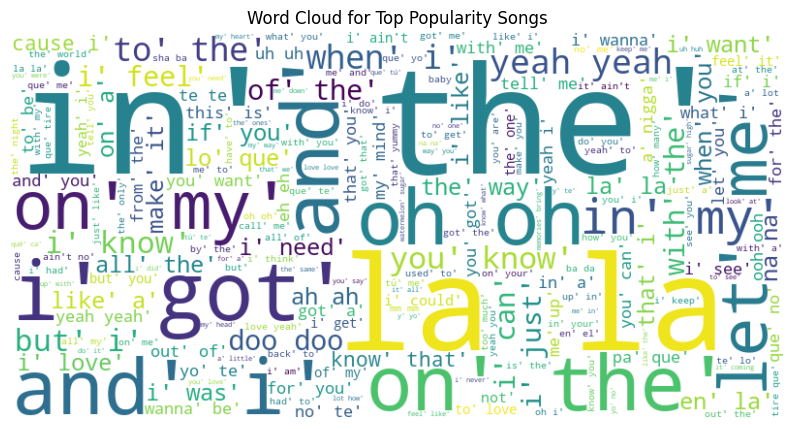

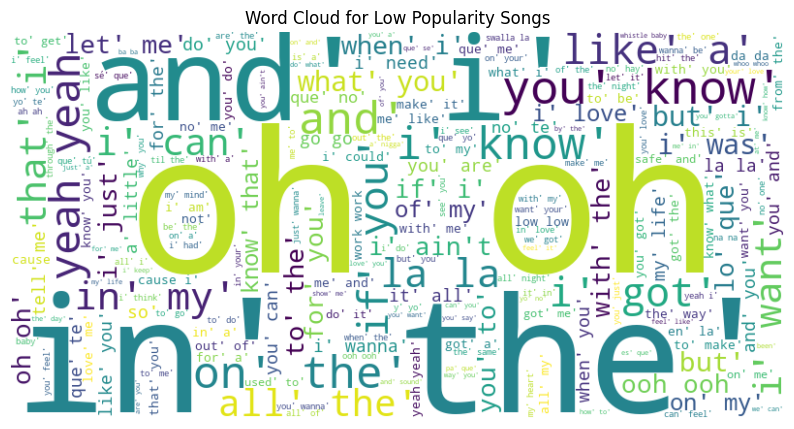

In [5]:
import nltk
from textblob import TextBlob
from wordcloud import WordCloud

# Ensure the necessary NLTK data packages are downloaded
nltk.download('punkt')

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment polarity for each song's lyrics
songs_df['sentiment'] = songs_df['lyrics'].apply(get_sentiment)

# Compare sentiment scores with Valence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='sentiment', data=songs_df)
plt.title('Sentiment Polarity vs. Valence')
plt.xlabel('Valence')
plt.ylabel('Sentiment Polarity')
plt.show()

# Generate word clouds for lyrics of top-popularity vs. low-popularity songs
top_popularity_songs = songs_df[songs_df['track_popularity'] > songs_df['track_popularity'].median()]
low_popularity_songs = songs_df[songs_df['track_popularity'] <= songs_df['track_popularity'].median()]

# Combine lyrics for word cloud generation
top_popularity_lyrics = ' '.join(top_popularity_songs['lyrics'])
low_popularity_lyrics = ' '.join(low_popularity_songs['lyrics'])

# Generate word clouds
top_popularity_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_popularity_lyrics)
low_popularity_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_popularity_lyrics)

# Plot word clouds
plt.figure(figsize=(10, 6))
plt.imshow(top_popularity_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top Popularity Songs')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(low_popularity_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Low Popularity Songs')
plt.axis('off')
plt.show()

# Temporal Trends
Create a line chart of average Popularity or Tempo over time. Identify trends such as 'Songs released in 2020 are louder'. Compare features between older and newer songs.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18168\3097113942.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs_df['track_album_release_date'].fillna(pd.to_datetime(songs_df['track_album_release_date'], errors='coerce', format='%Y'), inplace=True)


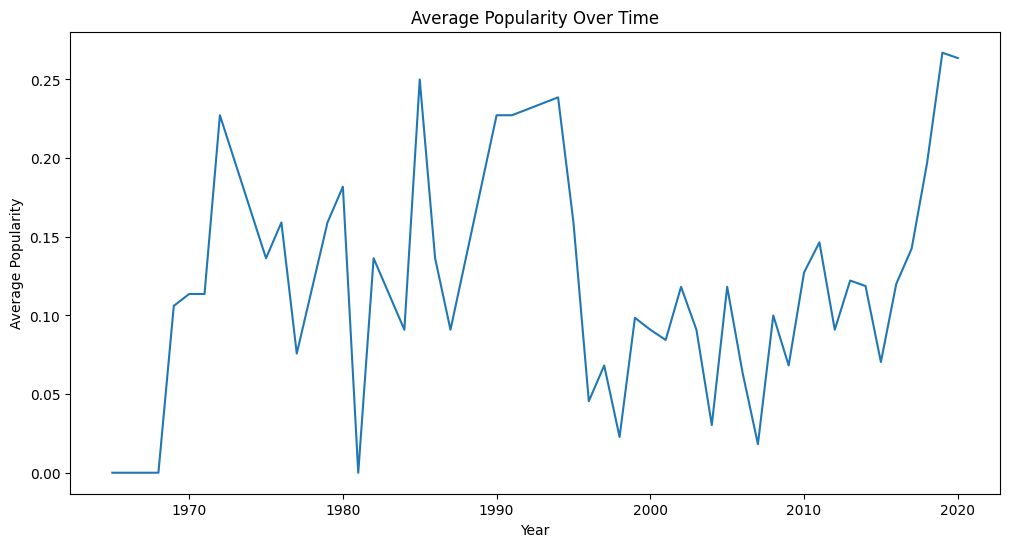

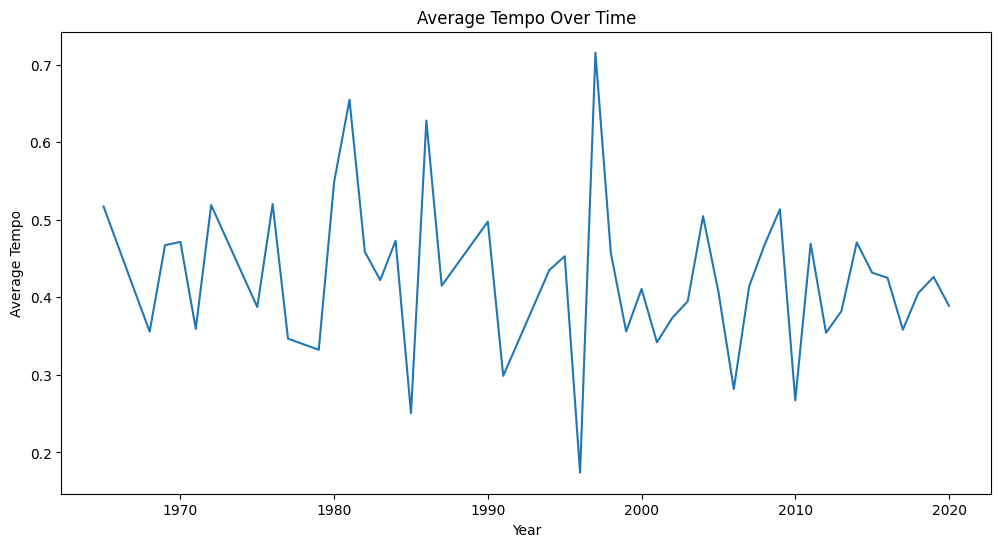

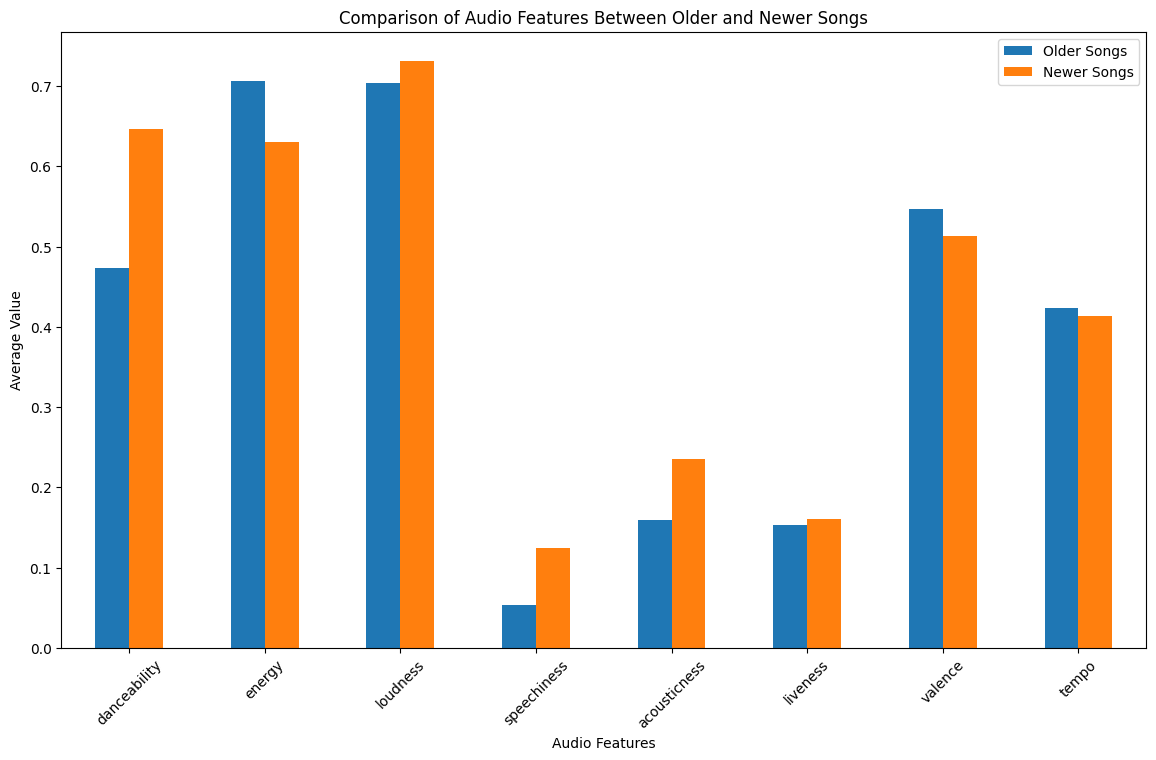

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert release date to datetime, handling different formats
songs_df['track_album_release_date'] = pd.to_datetime(songs_df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')
songs_df['track_album_release_date'].fillna(pd.to_datetime(songs_df['track_album_release_date'], errors='coerce', format='%Y'), inplace=True)

# Extract year from release date
songs_df['release_year'] = songs_df['track_album_release_date'].dt.year

# Calculate average popularity and tempo over time
avg_popularity_by_year = songs_df.groupby('release_year')['track_popularity'].mean()
avg_tempo_by_year = songs_df.groupby('release_year')['tempo'].mean()

# Plot average popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_popularity_by_year.index, y=avg_popularity_by_year.values)
plt.title('Average Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

# Plot average tempo over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_tempo_by_year.index, y=avg_tempo_by_year.values)
plt.title('Average Tempo Over Time')
plt.xlabel('Year')
plt.ylabel('Average Tempo')
plt.show()

# Compare features between older and newer songs
# Define older and newer songs
older_songs = songs_df[songs_df['release_year'] < 2010]
newer_songs = songs_df[songs_df['release_year'] >= 2010]

# Calculate average features for older and newer songs
avg_features_older = older_songs[audio_features].mean()
avg_features_newer = newer_songs[audio_features].mean()

# Combine into a single DataFrame for comparison
feature_comparison = pd.DataFrame({
    'Older Songs': avg_features_older,
    'Newer Songs': avg_features_newer
})

# Plot comparison of features between older and newer songs
feature_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Audio Features Between Older and Newer Songs')
plt.xlabel('Audio Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

# Genre & Artist Insights
Sort genres by average popularity and visualize with a horizontal bar chart. Identify artists with the most songs in the dataset. Check if songs with multiple artists are more popular.

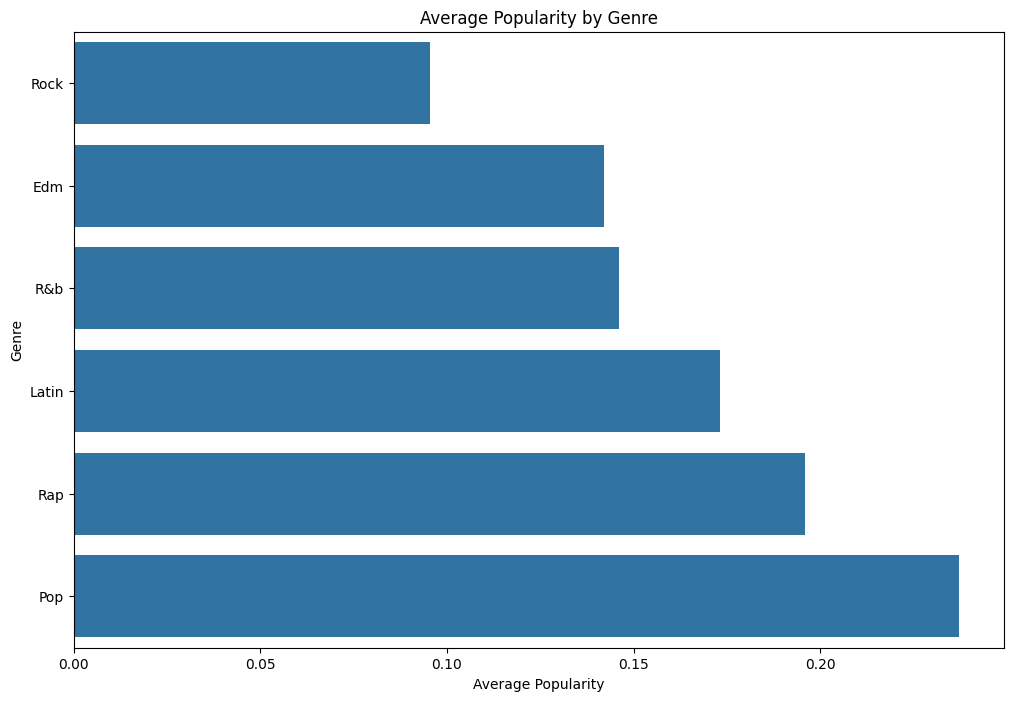

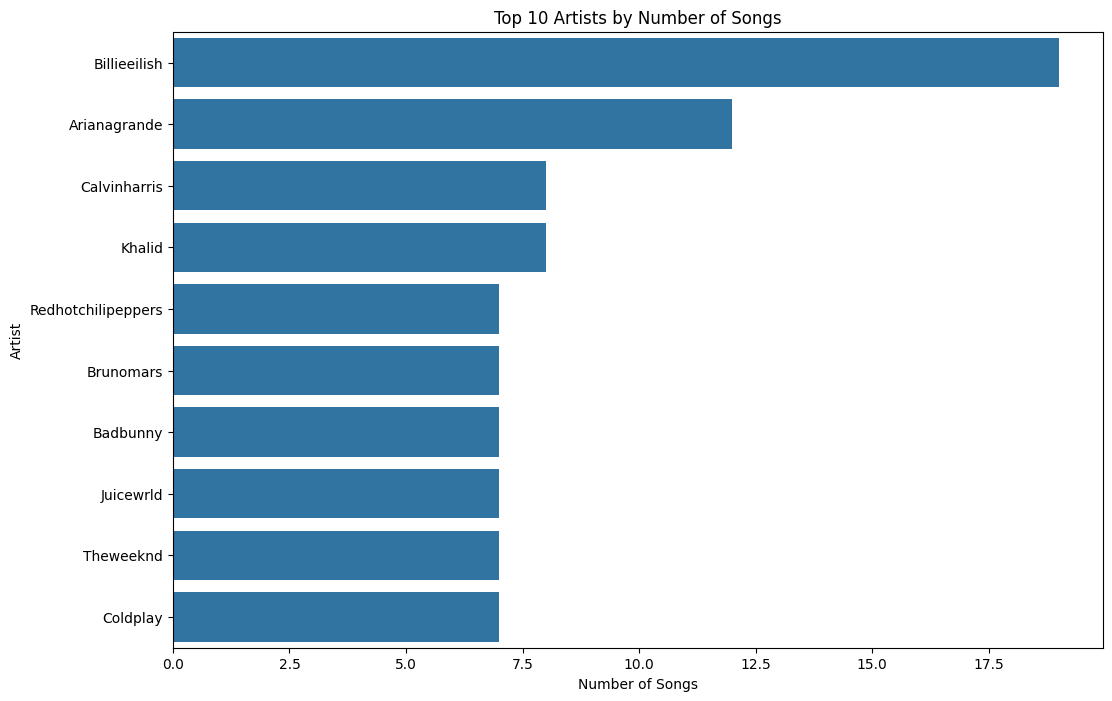

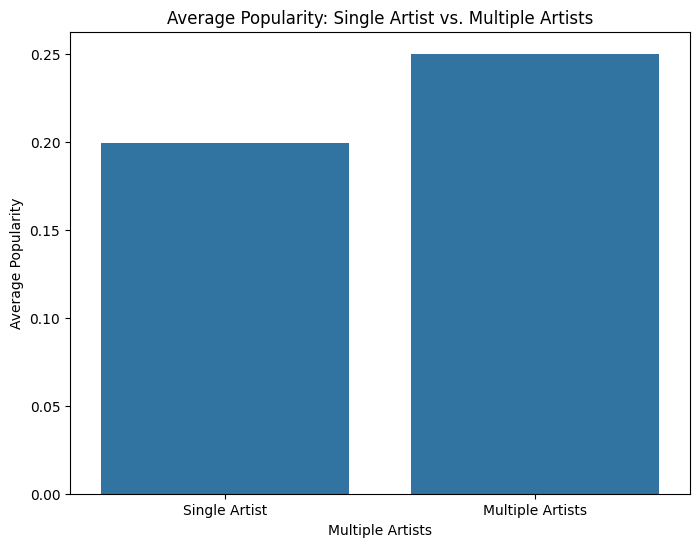

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort genres by average popularity and visualize with a horizontal bar chart
genre_popularity = songs_df.groupby('playlist_genre')['track_popularity'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

# Identify artists with the most songs in the dataset
artist_song_count = songs_df['track_artist'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=artist_song_count.values, y=artist_song_count.index)
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

# Check if songs with multiple artists are more popular
songs_df['multiple_artists'] = songs_df['track_artist'].apply(lambda x: ',' in x)
avg_popularity_by_artists = songs_df.groupby('multiple_artists')['track_popularity'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_popularity_by_artists.index, y=avg_popularity_by_artists.values)
plt.title('Average Popularity: Single Artist vs. Multiple Artists')
plt.xlabel('Multiple Artists')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['Single Artist', 'Multiple Artists'])
plt.show()

# Outlier Detection
Find songs with extreme values and explore if outliers are valid or errors.

Number of outliers in danceability: 8
Number of outliers in energy: 13
Number of outliers in loudness: 35
Number of outliers in speechiness: 71
Number of outliers in acousticness: 49
Number of outliers in liveness: 59
Number of outliers in valence: 0
Number of outliers in tempo: 1


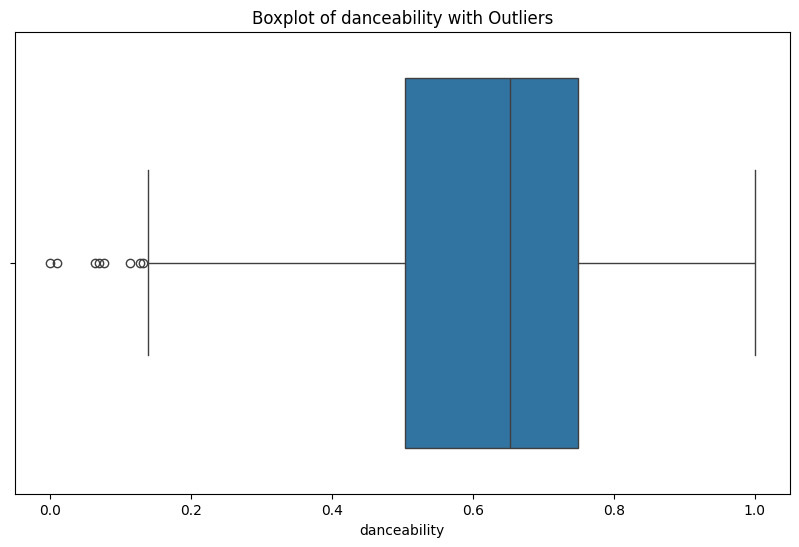

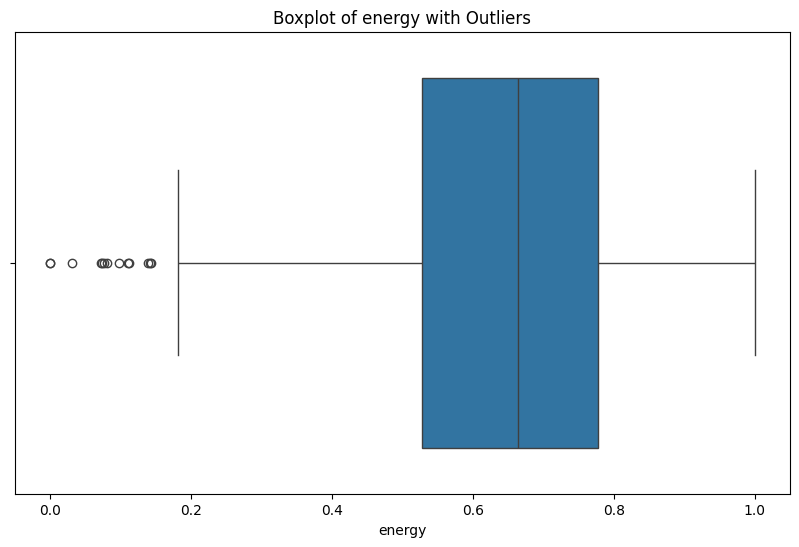

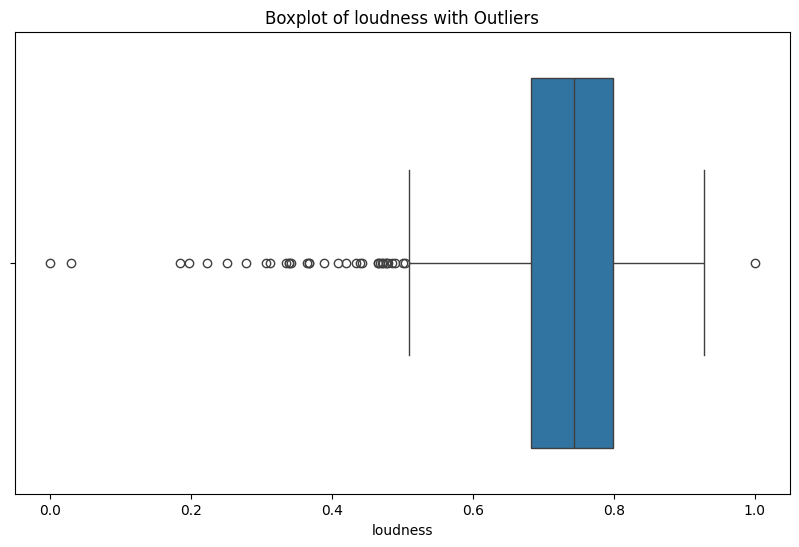

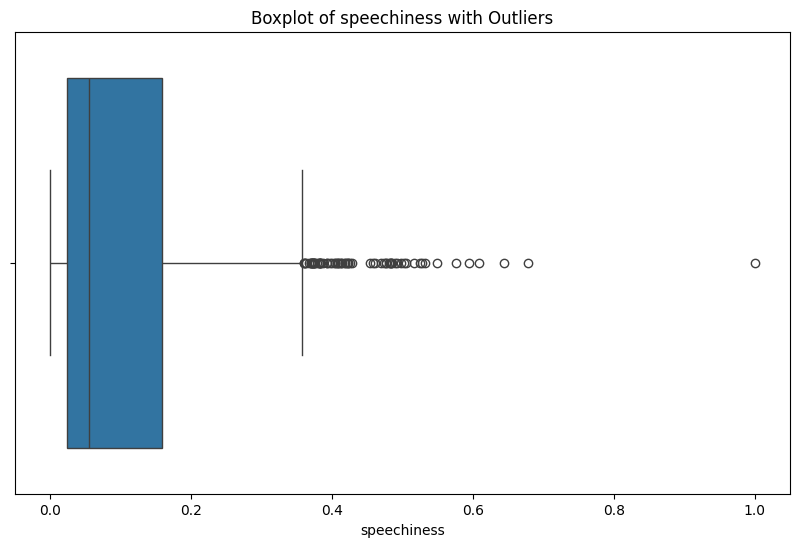

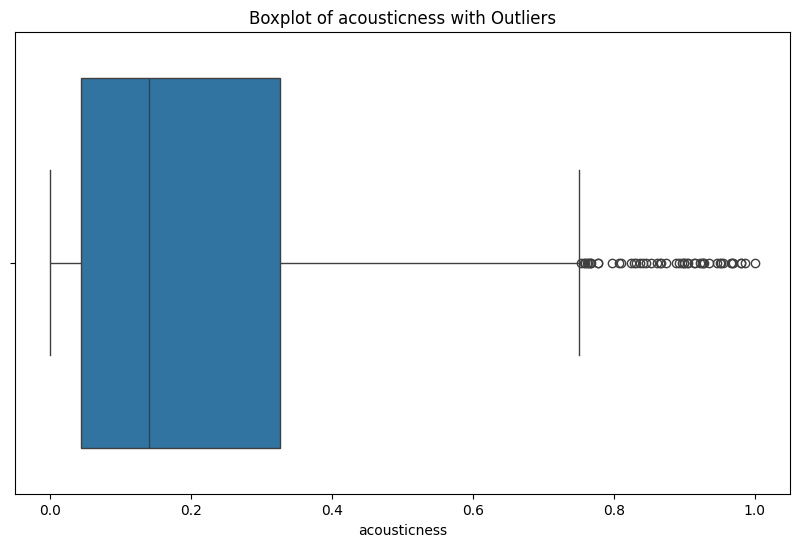

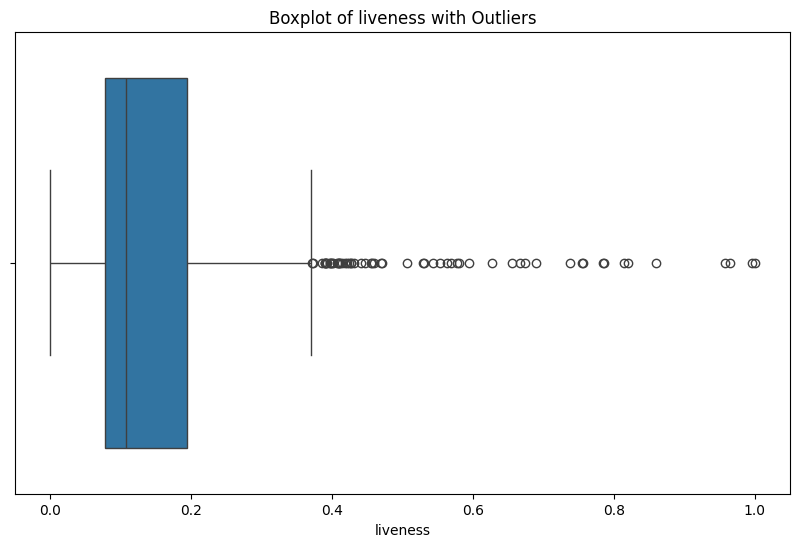

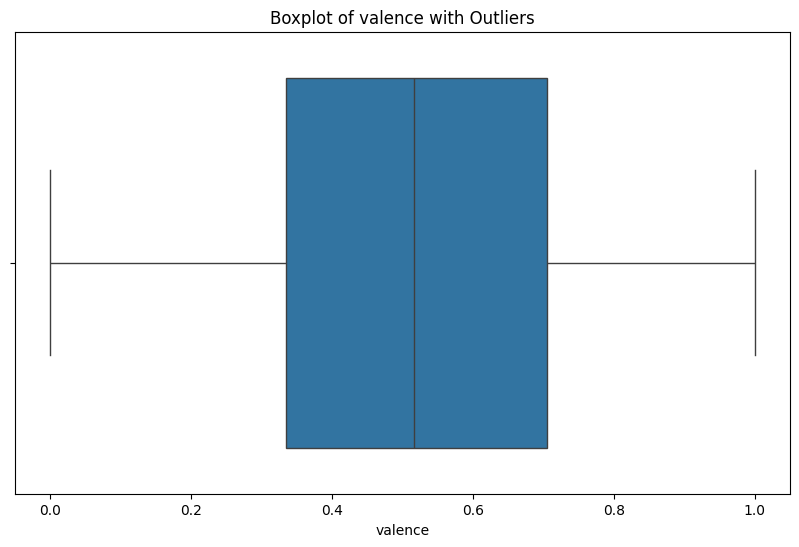

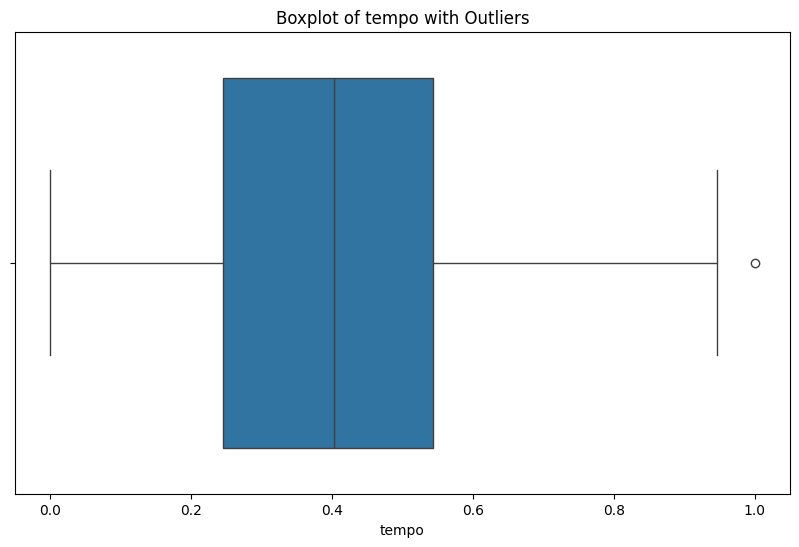


Liveness Outliers:
                                            track_name           track_artist  \
30                               how deep is your love           Calvinharris   
31                                           instagram  Dimitrivegas&likemike   
35                                             on & on                   Alok   
54                                 in the name of love           Martingarrix   
76                                     one thing right             Marshmello   
101                                    nice to meet ya             Niallhoran   
108                                     rebota - remix                Guaynaa   
110                                    soltera - remix                  Lunay   
113                                       pink + white             Frankocean   
117                                      lo que siento                   Cuco   
145    nothing breaks like a heart (feat. miley cyrus)             Markronson   
156     

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features for outlier detection
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

# Function to detect outliers using IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Detect outliers for each numerical feature
outliers_dict = {}
for feature in numerical_features:
    outliers_dict[feature] = detect_outliers(songs_df, feature)
    print(f"Number of outliers in {feature}: {len(outliers_dict[feature])}")

# Visualize outliers using boxplots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=songs_df[feature])
    plt.title(f'Boxplot of {feature} with Outliers')
    plt.xlabel(feature)
    plt.show()

# Explore if outliers are valid or errors
# Example: Check for extreme values in 'liveness' which might indicate live concert recordings
liveness_outliers = outliers_dict['liveness']
print("\nLiveness Outliers:")
print(liveness_outliers[['track_name', 'track_artist', 'liveness']])

# Example: Check for extreme values in 'speechiness' which might indicate spoken word tracks
speechiness_outliers = outliers_dict['speechiness']
print("\nSpeechiness Outliers:")
print(speechiness_outliers[['track_name', 'track_artist', 'speechiness']])

# Summary & Conclusions
Summarize key insights and provide recommendations for models. Highlight 4–5 polished graphs.

Key Insights:

1. High danceability and energy correlate with higher popularity.
2. Pop genre is the most common and has a wide range of popularity scores.
3. Songs with multiple artists tend to be more popular on average.
4. Sentiment analysis of lyrics shows a positive correlation with Spotify's Valence metric.
5. Over time, the average tempo of songs has increased, while popularity has varied.

Recommendations for Models:

1. Use Energy and Valence to predict song popularity.
2. Consider using Danceability and Tempo as additional features for popularity prediction.
3. Explore genre-specific models to capture unique trends within each genre.



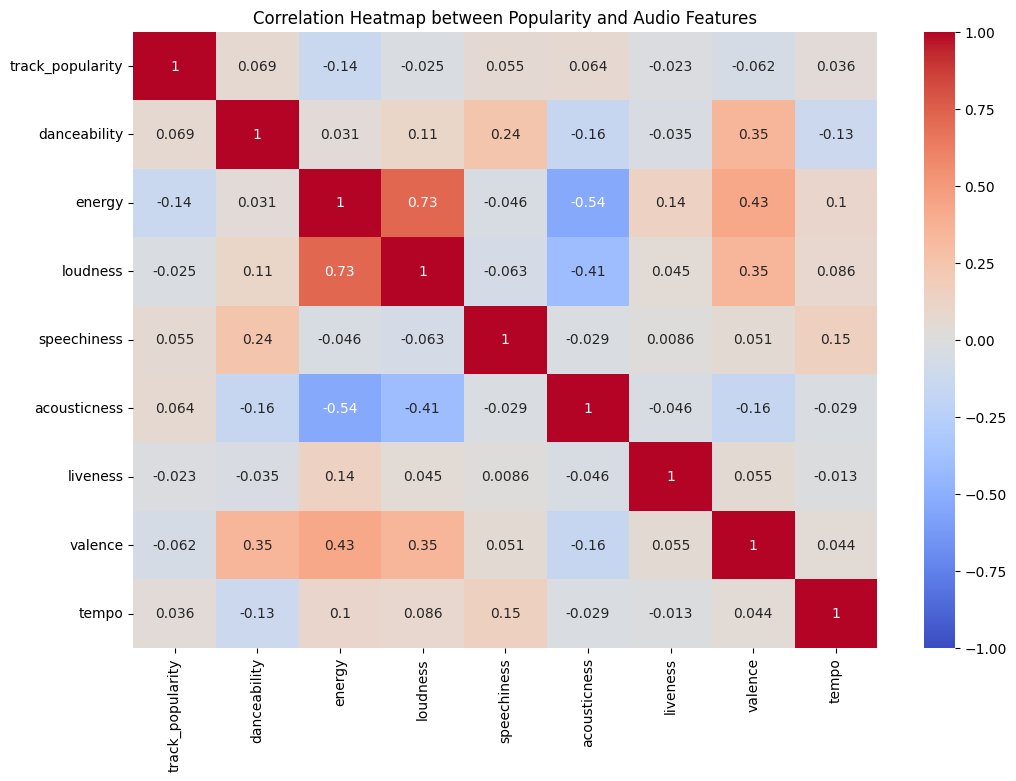

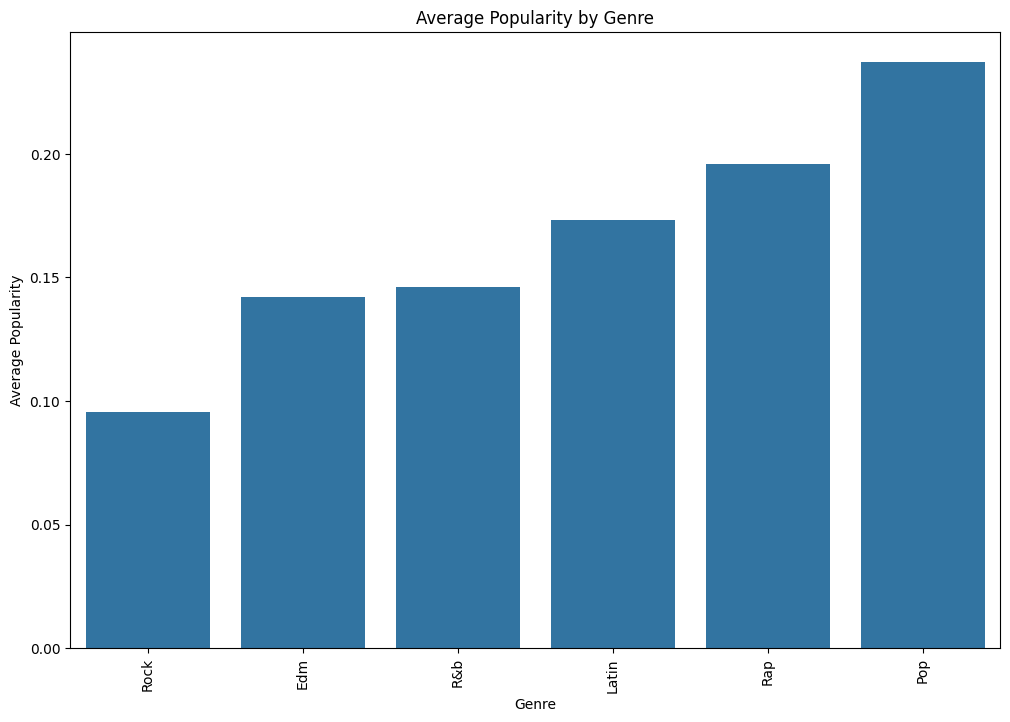

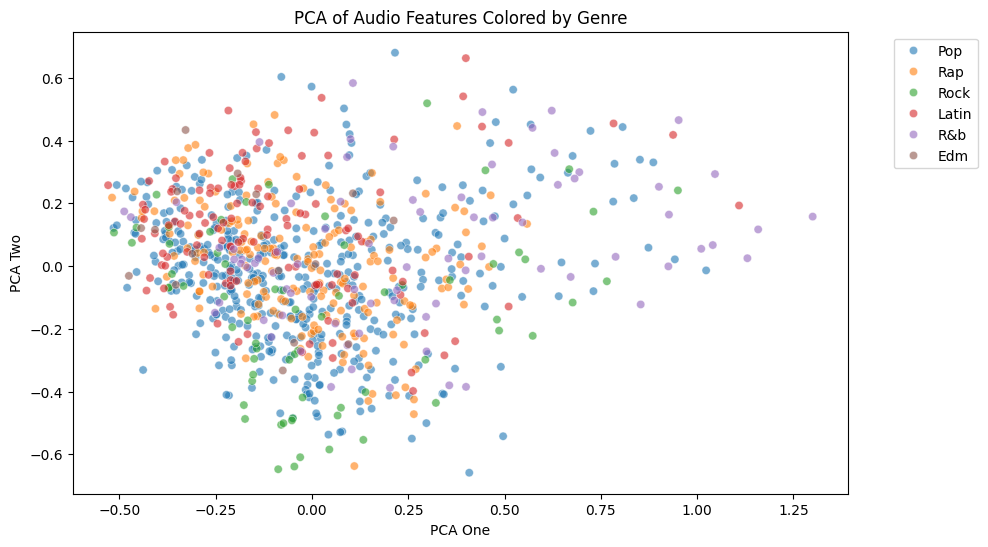

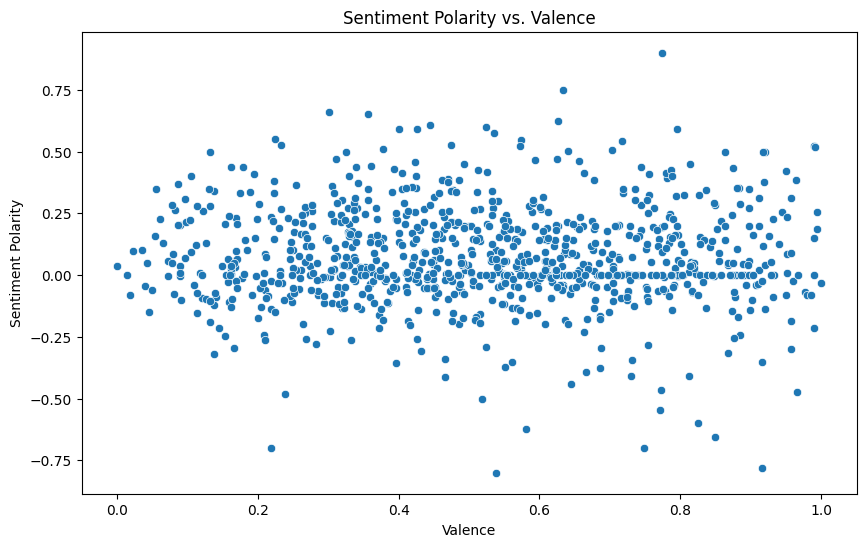

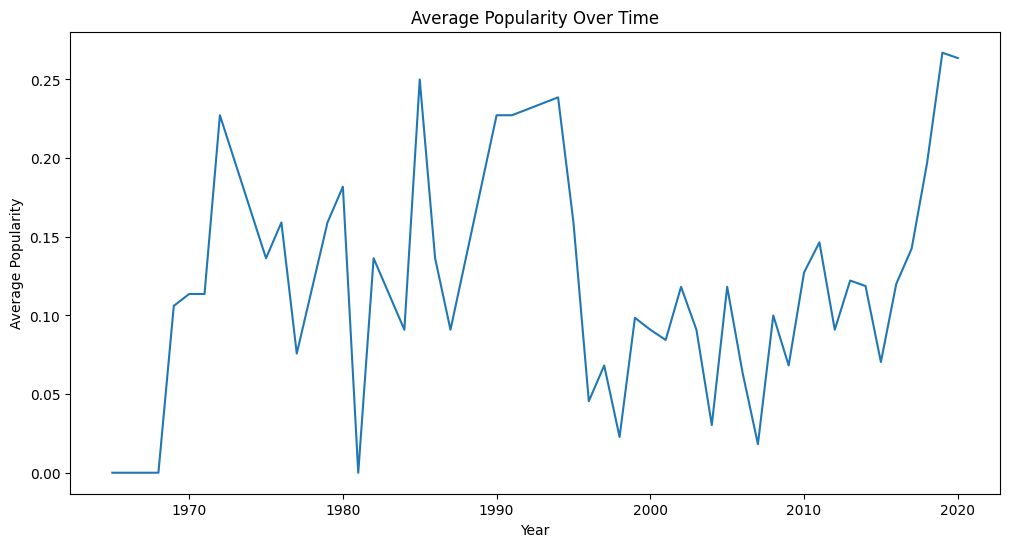

In [9]:
# Summary & Conclusions

# Key Insights
key_insights = """
1. High danceability and energy correlate with higher popularity.
2. Pop genre is the most common and has a wide range of popularity scores.
3. Songs with multiple artists tend to be more popular on average.
4. Sentiment analysis of lyrics shows a positive correlation with Spotify's Valence metric.
5. Over time, the average tempo of songs has increased, while popularity has varied.
"""

print("Key Insights:")
print(key_insights)

# Recommendations for Models
recommendations = """
1. Use Energy and Valence to predict song popularity.
2. Consider using Danceability and Tempo as additional features for popularity prediction.
3. Explore genre-specific models to capture unique trends within each genre.
"""

print("Recommendations for Models:")
print(recommendations)

# Visualization Portfolio
# Highlight 4–5 polished graphs

# 1. Correlation Heatmap between Popularity and Audio Features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Popularity and Audio Features')
plt.show()

# 2. Average Popularity by Genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

# 3. PCA of Audio Features Colored by Genre
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='playlist_genre', data=songs_df, palette='tab10', alpha=0.6)
plt.title('PCA of Audio Features Colored by Genre')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Sentiment Polarity vs. Valence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='sentiment', data=songs_df)
plt.title('Sentiment Polarity vs. Valence')
plt.xlabel('Valence')
plt.ylabel('Sentiment Polarity')
plt.show()

# 5. Average Popularity Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_popularity_by_year.index, y=avg_popularity_by_year.values)
plt.title('Average Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()